
# Logical model representing the behavior of Intestinal Epithelial Cells (IECs) under the cytokine environment in the chronic stage of Inflammatory Bowel Disease (IBD)

This notebook is created for the analysis of the Inflammatory Bowel Disease (IBD) model representing intracellular pathways in Intestinal Epithelial Cells (IEC) during the chronic phase of the disease.


### Import packages

First, necessary packages need to be imported before performing the analysis. (In addtion to some settings to obtain nice-looking tables)

In [52]:
import ginsim 
import csv
import biolqm
from colomoto_jupyter import tabulate
from colomoto.temporal_logics import *
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)


#Hide FutureWarning from Pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## The IBD Epithelial Cell logical model

The logical model represents the behavior of Intestinal Epithelial Cells (IECs) during the chronic stage of Inflammatory Bowel Disease (IBD) in response to the main cytokines and pathogen related-entities present in the local intestinal environment. 

The main cytokines that account for the characteristic cytokine milieu are TNF and IFNg (namely derived from Th1 cells), and IL17 and IL22 (namely derived from Th17 cells). Pathways activated by these cytokines are acquired from the psoKC (psoriatic keratinocyte) model created by Eirini Tsirvouli. However, the signaling molecules in the IBD-IEC model involved in these pathways may differ from the ones in the psoKC model.

Moreover, since microbial dysbiosis plays an important role in development and relapse of IBD, some bacterial components (LPS, PGN and MDP) are added as inputs which trigger the activation of pattern recognition receptors (PRRs), and their downstream pathways. Type I and III interferon signaling was also included to the model, since several of the IBD-associated genes are also involved in these pathways (e.g. *JAK2*, *TYK2*, *STAT1*).


### Load and visualize network

In [53]:
gs_model = ginsim.load("IBD_logical_model.zginml")

print(' Figure 1. The logical model of Intestinal Epithelial cells during the chronic phase of IBD')


#shows the GINsim version before editing
#ginsim.show(gs_model)

 Figure 1. The logical model of Intestinal Epithelial cells during the chronic phase of IBD


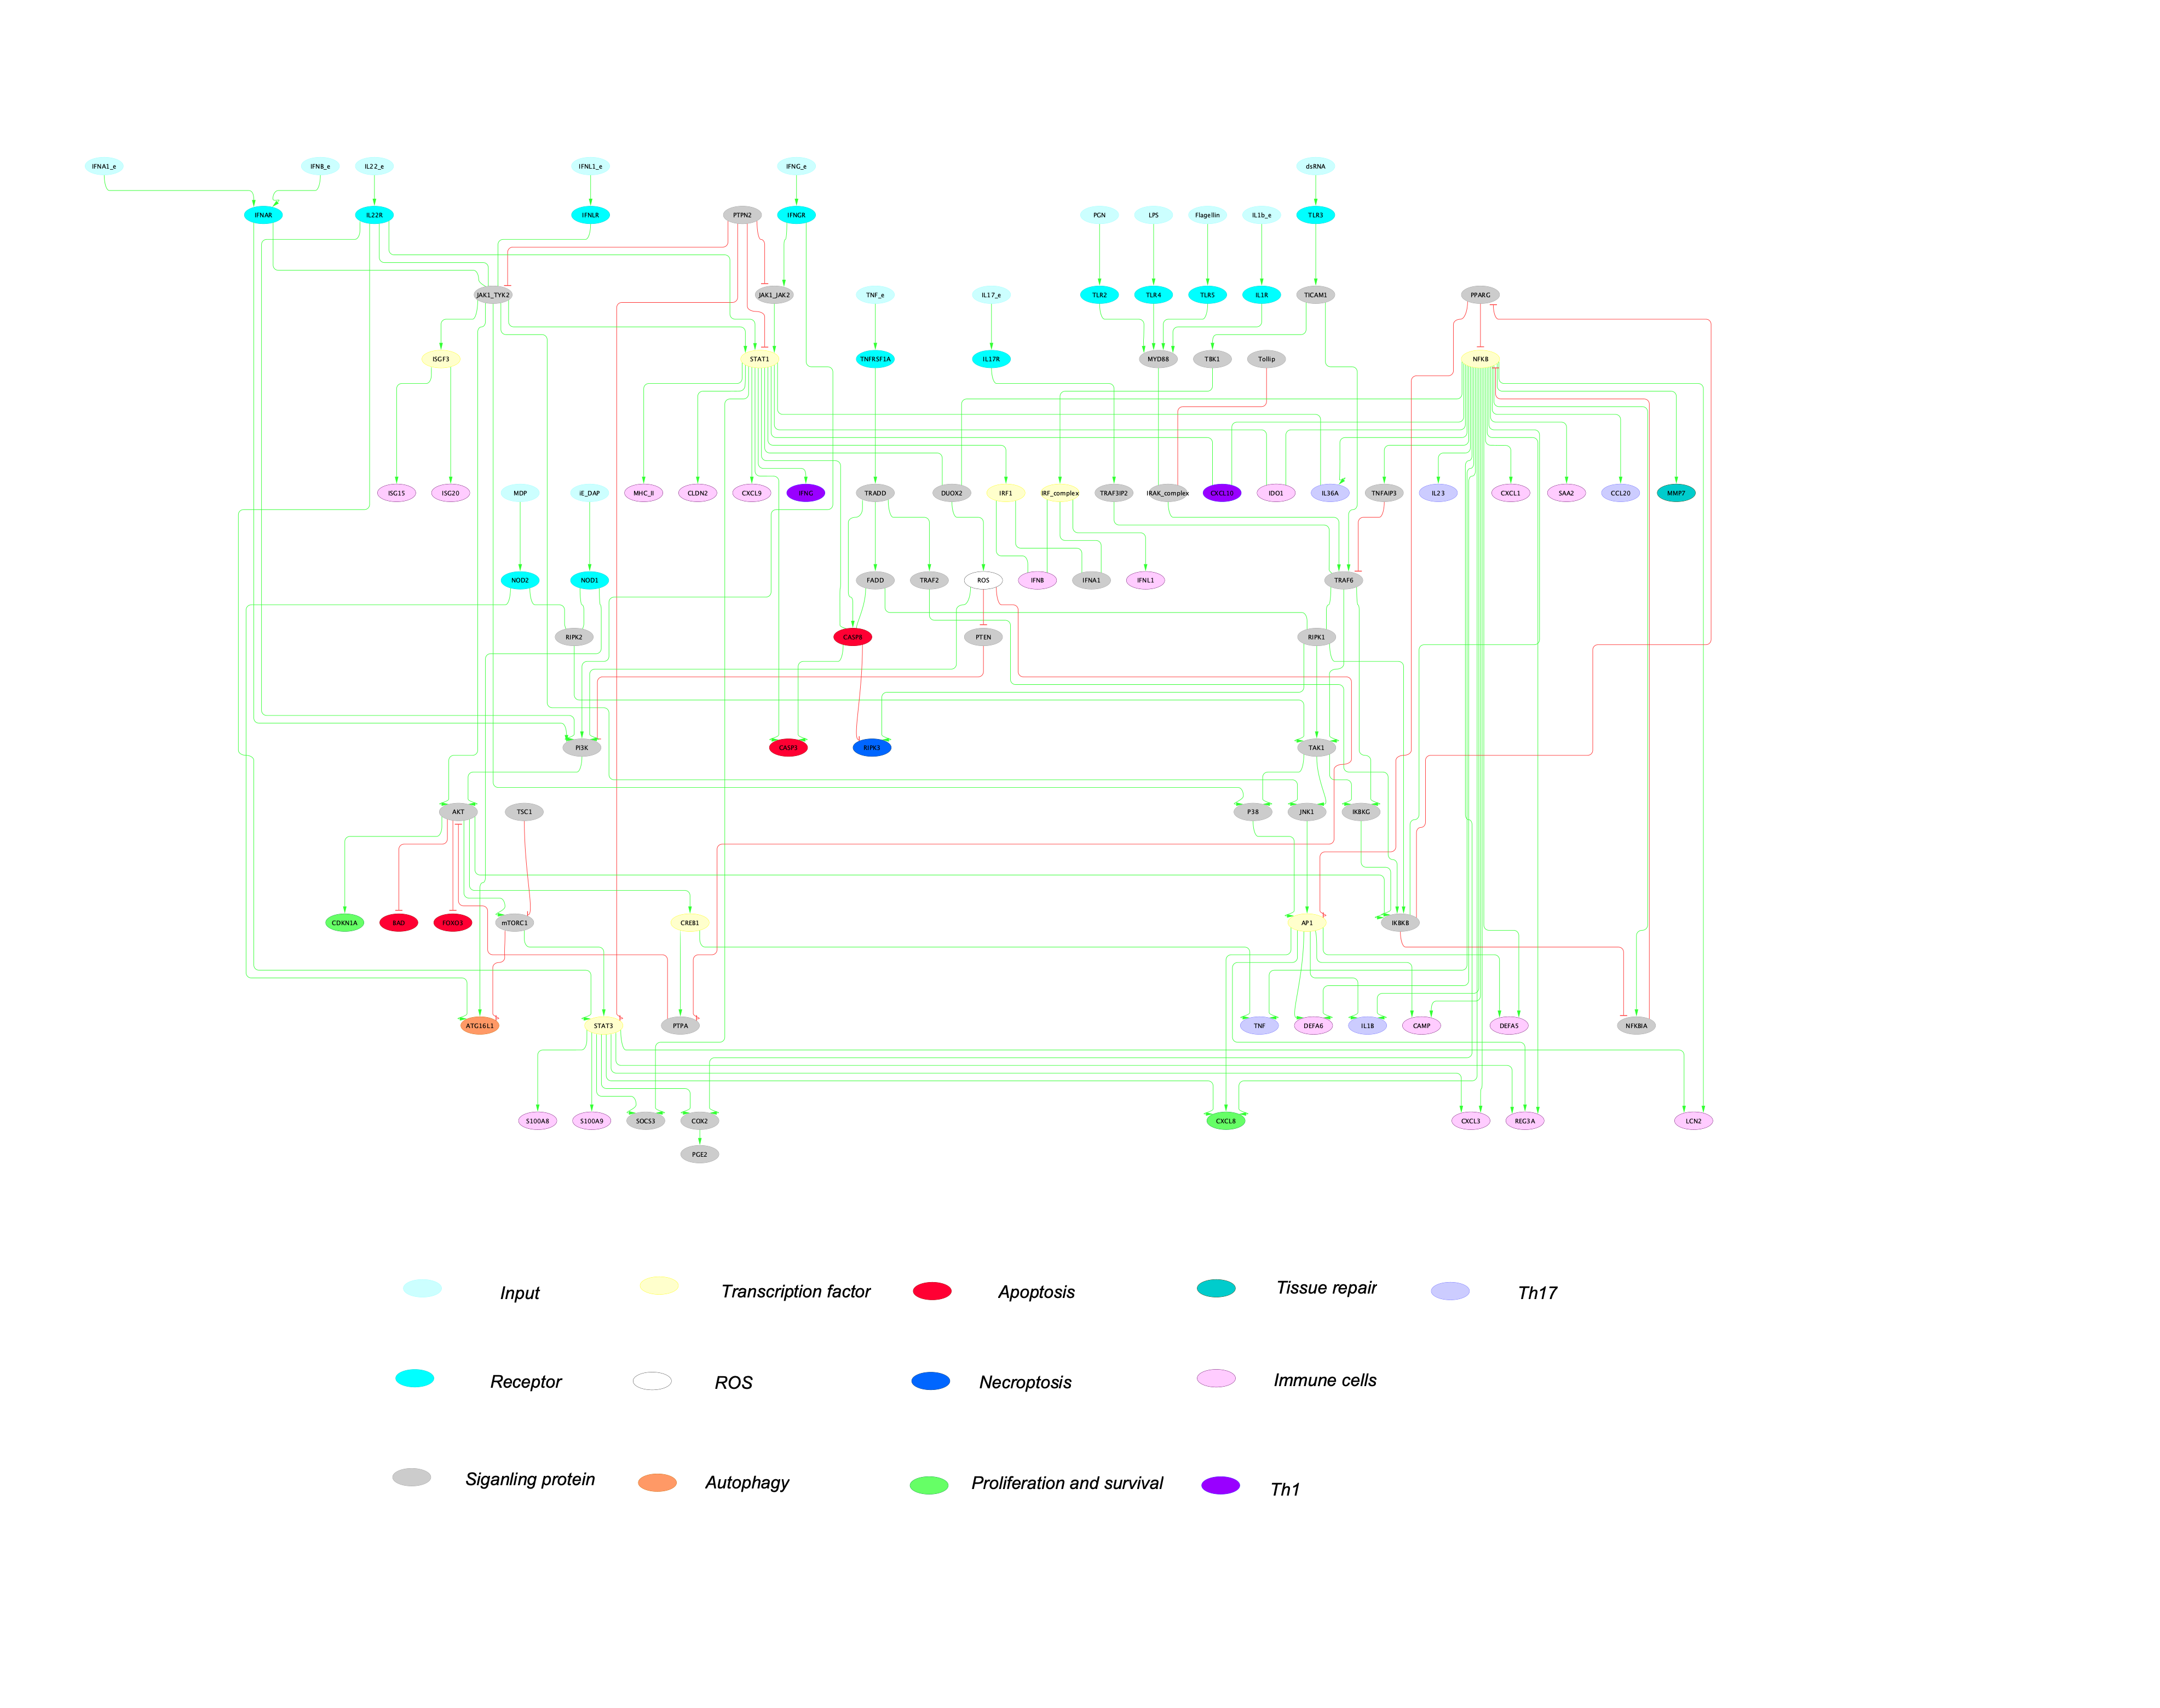

### Convert model to different formats


For further analysis it is necessary to convert the GINsim model to other formats (bioLQM and Pint)


In [4]:
lqm_model = ginsim.to_biolqm(gs_model)
pint_model = biolqm.to_pint(lqm_model)

Acquire a summary of the general model properties with Pint:

In [5]:
print('Table 1. Summary of general model properties')
pint_model.summary()

Table 1. Summary of general model properties


{'nb_automata': 104,
 'nb_local_states': 208,
 'max_local_states': 2,
 'nb_transitions': 253,
 'nb_states': 20282409603651670423947251286016}

## Node-phenotype associations


The model consist of 9 marker nodes associated with the fate of IECs: Apoptosis, Proliferation, Tissue repair, Necroptosis and Authophagy. Additionally, 26 marker nodes are associated with the activation, recruitment and maintenance of three subpopulations of immune cells: Th1, Th17/22, and other immune cells, mainly referring to Neutrophils. The association between nodes and phenotypes are shown in the table below:  


In [6]:
print('Table 2. Association between markers and their respective phenotype')

Node_phenotype = {"Node": ['BAD', 'CASP3', 'CASP8', 'FOXO3', 'RIPK3', 'ATG16L1', 'CXCL8', 'CDKN1A', 'MMP7', 'CLDN2', 'CXCL1', 'CXCL9', 'CXCL3', 'IFNL1', 'IFNA1', 'IDO1', 'SAA2', 'DEFA6', 'DEFA5', 'CAMP','IFNB', 'ISG15', 'LCN2', 'ISG20', 'REG3A' , 'S100A8', 'S100A9', 'MHC_II', 'IFNG', 'CXCL10', 'CCL20','IL1B', 'IL23','IL36A','TNF'], 
                  "Main Phenotype": ['Apoptosis', 'Apoptosis', 'Apoptosis','Apoptosis', 'Necroptosis', 'Autophagy' , 'Proliferation', 'Proliferation' , 'Tissue repair', 'Immune cells', 'Immune cells' , 'Immune cells' ,'Immune cells','Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells','Immune cells', 'Immune cells','Immune cells','Immune cells','Immune cells','Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells','Th1', 'Th1', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22']}

df_phen = pd.DataFrame(data=Node_phenotype)
df_phen.style.hide_index()

Table 2. Association between markers and their respective phenotype


Node,Main Phenotype
BAD,Apoptosis
CASP3,Apoptosis
CASP8,Apoptosis
FOXO3,Apoptosis
RIPK3,Necroptosis
ATG16L1,Autophagy
CXCL8,Proliferation
CDKN1A,Proliferation
MMP7,Tissue repair
CLDN2,Immune cells


## Identification of attractors (bioLQM)


The following code defines the input conditions of interest (TNF, TNF+IL17, cocktail consisting of IFNg, IL17, IL1b, TNF and IL22, type I, II and III interferon response (IFNs), and activation of every receptor triggering inflammatory signaling pathways in IECs (ALL)), and the resulting state of the markers and regulators.

In [10]:
#Define input conditions

inpTNF = ('IL22R == 0 & IL17R == 0 & TNFRSF1A == 1 & IFNGR == 0 & IFNAR == 0 & NOD1 == 0 & NOD2 == 0 & TLR3 == 0 & TLR2 == 0 & TLR4 == 0 & TLR5 == 0 & IL1R == 0 & IFNLR == 0')
inpTNF_IL17 = ('IL22R == 0 & IL17R == 1 & TNFRSF1A == 1 & IFNGR == 0 & IFNAR == 0 & NOD1 == 0 & NOD2 == 0 & TLR3 == 0 & TLR2 == 0 & TLR4 == 0 & TLR5 == 0 & IL1R == 0 & IFNLR == 0 ')
inpcocktail = ('IL22R == 1 & IL17R == 1 & TNFRSF1A == 1 & IFNGR == 1 & IFNAR == 0 & NOD1 == 0 & NOD2 == 0 & TLR3 == 0 & TLR2 == 0 & TLR4 == 0 & TLR5 == 0 & IL1R == 1 & IFNLR == 0')
inpIFNs = ('IL22R == 0 & IL17R == 0 & TNFRSF1A == 0 & IFNGR == 1 & IFNAR == 1 & NOD1 == 0 & NOD2 == 0 & TLR3 == 0 & TLR2 == 0 & TLR4 == 0 & TLR5 == 0 & IL1R == 0 & IFNLR == 1')
inpALL = ('IL22R == 1 & IL17R == 1 & TNFRSF1A == 1 & IFNGR == 1 & IFNAR == 1 & NOD1 == 1 & NOD2 == 1 & TLR3 == 1 & TLR2 == 1 & TLR4 == 1 & TLR5 == 1 & IL1R == 1 & IFNLR == 1')


#Prepare indexes with only output nodes

markers = ['BAD', 'CASP3', 'CASP8', 'FOXO3', 'RIPK3', 'ATG16L1', 'CXCL8', 'CDKN1A', 'MMP7', 'CLDN2', 'CXCL1', 'CXCL9', 'CXCL3', 'IFNL1', 'IFNA1', 'IDO1', 'SAA2', 'DEFA6', 'DEFA5', 'CAMP','IFNB', 'ISG15', 'LCN2', 'ISG20', 'REG3A' , 'S100A8', 'S100A9', 'MHC_II', 'IFNG', 'CXCL10', 'CCL20','IL1B', 'IL23','IL36A','TNF']
phen_arrays = [[ 'Apoptosis', 'Apoptosis', 'Apoptosis','Apoptosis', 'Necroptosis', 'Autophagy' , 'Proliferation', 'Proliferation' , 'Tissue repair', 'Immune cells', 'Immune cells' , 'Immune cells' ,'Immune cells','Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells','Immune cells', 'Immune cells','Immune cells','Immune cells','Immune cells','Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells','Th1', 'Th1', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22', 'Th17/22'],
              markers]

regulators= ['IL22R', 'IL17R', 'TNFRSF1A', 'IFNGR','IFNAR','NOD1','NOD2','TLR3', 'TLR2', 'TLR4', 'TLR5', 'IL1R', 'IFNLR','ROS','AKT','COX2','DUOX2','FADD','IKBKB','IKBKG','IRAK_complex','JAK1_TYK2','JAK1_JAK2','JNK1', 'mTORC1', 'MYD88','NFKBIA', 'P38','PGE2','PI3K','PPARG','PTEN','PTPA','PTPN2','RIPK1','RIPK2','SOCS3','TAK1','TBK1','TICAM1','TNFAIP3','Tollip','TRADD','TRAF2','TRAF3IP2','TRAF6','TSC1', 'AP1', 'CREB1','IRF_complex', 'ISGF3', 'NFKB', 'STAT1','STAT3','IRF1']
reg_arrays = [['Receptor','Receptor','Receptor','Receptor','Receptor','Receptor','Receptor','Receptor','Receptor','Receptor','Receptor','Receptor','Receptor', 'ROS','Signaling protein', 'Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Signaling protein','Transcription factor','Transcription factor','Transcription factor','Transcription factor','Transcription factor','Transcription factor','Transcription factor','Transcription factor']
              ,regulators]


In [8]:
# Compute stable states
fixpoints = biolqm.fixpoints(lqm_model)
fix_df = pd.DataFrame(fixpoints)


#tabulate(fixpoints)

# Uncomment to save stable states as a csv
# fix_df.to_csv('fixpoints.csv')

### Predictions of the behavvior of IECs in response to various inputs

In [13]:
# Set initial states
# Select only output nodes to show
# Create a multilevel index with phenotypes
# Show prediction results for the defined input

TNF_fp = fix_df.query(inpTNF) 
TNF_fp = TNF_fp[markers] 
TNF_fp.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])

print('Figure 2. Predicted states of markers with TNF present')

TNF_fp

Figure 2. Predicted states of markers with TNF present


Phenotype Apoptosis                   Necroptosis Autophagy Proliferation  \
Node            BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1         CXCL8   
5                 0     1     1     0           0         0             1   

Phenotype        Tissue repair Immune cells                                \
Node      CDKN1A          MMP7        CLDN2 CXCL1 CXCL9 CXCL3 IFNL1 IFNA1   
5              1             1            0     1     0     1     0     0   

Phenotype                                                                \
Node      IDO1 SAA2 DEFA6 DEFA5 CAMP IFNB ISG15 LCN2 ISG20 REG3A S100A8   
5            1    1     1     1    1    0     0    1     0     1      1   

Phenotype                Th1        Th17/22                      
Node      S100A9 MHC_II IFNG CXCL10   CCL20 IL1B IL23 IL36A TNF  
5              1      0    0      1       1    1    1     1   1

In [11]:
rTNF_fp = fix_df.query(inpTNF) 
rTNF_fp = rTNF_fp[regulators] 
rTNF_fp.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])

print('Figure 3. Predicted states of regulators with TNF present')

rTNF_fp

Figure 3. Predicted states of regulators with TNF present


Phenotype Receptor                                                           \
Node         IL22R IL17R TNFRSF1A IFNGR IFNAR NOD1 NOD2 TLR3 TLR2 TLR4 TLR5   
5                0     0        1     0     0    0    0    0    0    0    0   

Phenotype            ROS Signaling protein                              \
Node      IL1R IFNLR ROS               AKT COX2 DUOX2 FADD IKBKB IKBKG   
5            0     0   1                 1    1     1    1     1     0   

Phenotype                                                                     \
Node      IRAK_complex JAK1_TYK2 JAK1_JAK2 JNK1 mTORC1 MYD88 NFKBIA P38 PGE2   
5                    0         0         0    0      1     0      0   0    1   

Phenotype                                                                \
Node      PI3K PPARG PTEN PTPA PTPN2 RIPK1 RIPK2 SOCS3 TAK1 TBK1 TICAM1   
5            1     0    0    0     0     1     0     1    0    0      0   

Phenotype                                                Transcription factor  \
Node      TNFAIP3 Tollip TRADD TRAF2 TRAF3IP2 TRAF6 TSC1                  AP1   
5               1      0     1     1        0     0    0                    0   

Phenotype                                                
Node      CREB1 IRF_complex ISGF3 NFKB STAT1 STAT3 IRF1  
5             1           0     0    1     0     1    0

In [12]:
TNF_IL17_fp = fix_df.query(inpTNF_IL17) 
TNF_IL17_fp = TNF_IL17_fp[markers] 
TNF_IL17_fp.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])

print('Figure 4. Predicted states of markers with TNF and IL17 present')


TNF_IL17_fp

Figure 4. Predicted states of markers with TNF and IL17 present


Phenotype Apoptosis                   Necroptosis Autophagy Proliferation  \
Node            BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1         CXCL8   
7                 0     1     1     0           0         0             1   

Phenotype        Tissue repair Immune cells                                \
Node      CDKN1A          MMP7        CLDN2 CXCL1 CXCL9 CXCL3 IFNL1 IFNA1   
7              1             1            0     1     0     1     0     0   

Phenotype                                                                \
Node      IDO1 SAA2 DEFA6 DEFA5 CAMP IFNB ISG15 LCN2 ISG20 REG3A S100A8   
7            1    1     1     1    1    0     0    1     0     1      1   

Phenotype                Th1        Th17/22                      
Node      S100A9 MHC_II IFNG CXCL10   CCL20 IL1B IL23 IL36A TNF  
7              1      0    0      1       1    1    1     1   1

In [15]:
rTNF_IL17_fp = fix_df.query(inpTNF_IL17) 
rTNF_IL17_fp = rTNF_IL17_fp[regulators] 
rTNF_IL17_fp.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])

print('Figure 5. Predicted states of regulators  with TNF and IL17 present')


rTNF_IL17_fp

Figure 5. Predicted states of regulators  with TNF and IL17 present


Phenotype Receptor                                                           \
Node         IL22R IL17R TNFRSF1A IFNGR IFNAR NOD1 NOD2 TLR3 TLR2 TLR4 TLR5   
7                0     1        1     0     0    0    0    0    0    0    0   

Phenotype            ROS Signaling protein                              \
Node      IL1R IFNLR ROS               AKT COX2 DUOX2 FADD IKBKB IKBKG   
7            0     0   1                 1    1     1    1     1     0   

Phenotype                                                                     \
Node      IRAK_complex JAK1_TYK2 JAK1_JAK2 JNK1 mTORC1 MYD88 NFKBIA P38 PGE2   
7                    0         0         0    0      1     0      0   0    1   

Phenotype                                                                \
Node      PI3K PPARG PTEN PTPA PTPN2 RIPK1 RIPK2 SOCS3 TAK1 TBK1 TICAM1   
7            1     0    0    0     0     1     0     1    0    0      0   

Phenotype                                                Transcription factor  \
Node      TNFAIP3 Tollip TRADD TRAF2 TRAF3IP2 TRAF6 TSC1                  AP1   
7               1      0     1     1        1     0    0                    0   

Phenotype                                                
Node      CREB1 IRF_complex ISGF3 NFKB STAT1 STAT3 IRF1  
7             1           0     0    1     0     1    0

In [16]:
cocktail_fp = fix_df.query(inpcocktail) 
cocktail_fp = cocktail_fp[markers] 
cocktail_fp.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])

print('Figure 6. Predicted states of markers with cocktail stimulation')


cocktail_fp

Figure 6. Predicted states of markers with cocktail stimulation


Phenotype Apoptosis                   Necroptosis Autophagy Proliferation  \
Node            BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1         CXCL8   
709               0     1     1     0           0         0             1   

Phenotype        Tissue repair Immune cells                                \
Node      CDKN1A          MMP7        CLDN2 CXCL1 CXCL9 CXCL3 IFNL1 IFNA1   
709            1             1            1     1     1     1     0     1   

Phenotype                                                                \
Node      IDO1 SAA2 DEFA6 DEFA5 CAMP IFNB ISG15 LCN2 ISG20 REG3A S100A8   
709          1    1     1     1    1    1     1    1     1     1      1   

Phenotype                Th1        Th17/22                      
Node      S100A9 MHC_II IFNG CXCL10   CCL20 IL1B IL23 IL36A TNF  
709            1      1    1      1       1    1    1     1   1

In [17]:
rcocktail_fp = fix_df.query(inpcocktail) 
rcocktail_fp = rcocktail_fp[regulators] 
rcocktail_fp.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])

print('Figure 7. Predicted  states of regulators with cocktail stimulation')


rcocktail_fp

Figure 7. Predicted  states of regulators with cocktail stimulation


Phenotype Receptor                                                           \
Node         IL22R IL17R TNFRSF1A IFNGR IFNAR NOD1 NOD2 TLR3 TLR2 TLR4 TLR5   
709              1     1        1     1     0    0    0    0    0    0    0   

Phenotype            ROS Signaling protein                              \
Node      IL1R IFNLR ROS               AKT COX2 DUOX2 FADD IKBKB IKBKG   
709          1     0   1                 1    1     1    1     1     0   

Phenotype                                                                     \
Node      IRAK_complex JAK1_TYK2 JAK1_JAK2 JNK1 mTORC1 MYD88 NFKBIA P38 PGE2   
709                  1         1         1    1      1     1      0   1    1   

Phenotype                                                                \
Node      PI3K PPARG PTEN PTPA PTPN2 RIPK1 RIPK2 SOCS3 TAK1 TBK1 TICAM1   
709          1     0    0    0     0     1     0     1    0    0      0   

Phenotype                                                Transcription factor  \
Node      TNFAIP3 Tollip TRADD TRAF2 TRAF3IP2 TRAF6 TSC1                  AP1   
709             1      0     1     1        1     0    0                    1   

Phenotype                                                
Node      CREB1 IRF_complex ISGF3 NFKB STAT1 STAT3 IRF1  
709           1           0     1    1     1     1    1

In [18]:
IFNs_fp = fix_df.query(inpIFNs) 
IFNs_fp = IFNs_fp[markers] 
IFNs_fp.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])

print('Figure 8. Predicted states of markers with type I, II and III interferon present')

IFNs_fp = IFNs_fp.drop_duplicates()
IFNs_fp

Figure 8. Predicted states of markers with type I, II and III interferon present


Phenotype Apoptosis                   Necroptosis Autophagy Proliferation  \
Node            BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1         CXCL8   
40                0     1     1     0           0         0             1   

Phenotype        Tissue repair Immune cells                                \
Node      CDKN1A          MMP7        CLDN2 CXCL1 CXCL9 CXCL3 IFNL1 IFNA1   
40             1             1            1     1     1     1     0     1   

Phenotype                                                                \
Node      IDO1 SAA2 DEFA6 DEFA5 CAMP IFNB ISG15 LCN2 ISG20 REG3A S100A8   
40           1    1     1     1    1    1     1    1     1     1      1   

Phenotype                Th1        Th17/22                      
Node      S100A9 MHC_II IFNG CXCL10   CCL20 IL1B IL23 IL36A TNF  
40             1      1    1      1       1    1    1     1   1

In [19]:
rIFNs_fp = fix_df.query(inpIFNs) 
rIFNs_fp = rIFNs_fp[regulators] 
rIFNs_fp.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])

print('Figure 9. Predicted  states of regulators with type I, II and III interferon present')

rIFNs_fp = rIFNs_fp.drop_duplicates()
rIFNs_fp

Figure 9. Predicted  states of regulators with type I, II and III interferon present


Phenotype Receptor                                                           \
Node         IL22R IL17R TNFRSF1A IFNGR IFNAR NOD1 NOD2 TLR3 TLR2 TLR4 TLR5   
40               0     0        0     1     1    0    0    0    0    0    0   

Phenotype            ROS Signaling protein                              \
Node      IL1R IFNLR ROS               AKT COX2 DUOX2 FADD IKBKB IKBKG   
40           0     1   1                 1    1     1    0     1     0   

Phenotype                                                                     \
Node      IRAK_complex JAK1_TYK2 JAK1_JAK2 JNK1 mTORC1 MYD88 NFKBIA P38 PGE2   
40                   0         1         1    1      1     0      0   1    1   

Phenotype                                                                \
Node      PI3K PPARG PTEN PTPA PTPN2 RIPK1 RIPK2 SOCS3 TAK1 TBK1 TICAM1   
40           1     0    0    0     0     0     0     1    0    0      0   

Phenotype                                                Transcription factor  \
Node      TNFAIP3 Tollip TRADD TRAF2 TRAF3IP2 TRAF6 TSC1                  AP1   
40              1      0     0     0        0     0    0                    1   

Phenotype                                                
Node      CREB1 IRF_complex ISGF3 NFKB STAT1 STAT3 IRF1  
40            1           0     1    1     1     1    1

In [20]:
ALL_fp = fix_df.query(inpALL)
ALL_fp = ALL_fp[markers] 
ALL_fp.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])

print('Figure 10. Predicted states of markers with all cytokines and bacterial components present')


ALL_fp = ALL_fp.drop_duplicates()
ALL_fp

Figure 10. Predicted states of markers with all cytokines and bacterial components present


Phenotype Apoptosis                   Necroptosis Autophagy Proliferation  \
Node            BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1         CXCL8   
16128             0     1     1     0           0         0             1   

Phenotype        Tissue repair Immune cells                                \
Node      CDKN1A          MMP7        CLDN2 CXCL1 CXCL9 CXCL3 IFNL1 IFNA1   
16128          1             1            1     1     1     1     1     1   

Phenotype                                                                \
Node      IDO1 SAA2 DEFA6 DEFA5 CAMP IFNB ISG15 LCN2 ISG20 REG3A S100A8   
16128        1    1     1     1    1    1     1    1     1     1      1   

Phenotype                Th1        Th17/22                      
Node      S100A9 MHC_II IFNG CXCL10   CCL20 IL1B IL23 IL36A TNF  
16128          1      1    1      1       1    1    1     1   1

In [21]:
rALL_fp = fix_df.query(inpALL)
rALL_fp = rALL_fp[regulators] 
rALL_fp.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])

print('Figure 11. Predicted  states of regulators with all cytokines and bacterial components present')


rALL_fp = rALL_fp.drop_duplicates()
rALL_fp

Figure 11. Predicted  states of regulators with all cytokines and bacterial components present


Phenotype Receptor                                                           \
Node         IL22R IL17R TNFRSF1A IFNGR IFNAR NOD1 NOD2 TLR3 TLR2 TLR4 TLR5   
16128            1     1        1     1     1    1    1    1    1    1    1   

Phenotype            ROS Signaling protein                              \
Node      IL1R IFNLR ROS               AKT COX2 DUOX2 FADD IKBKB IKBKG   
16128        1     1   1                 1    1     1    1     1     1   

Phenotype                                                                     \
Node      IRAK_complex JAK1_TYK2 JAK1_JAK2 JNK1 mTORC1 MYD88 NFKBIA P38 PGE2   
16128                1         1         1    1      1     1      0   1    1   

Phenotype                                                                \
Node      PI3K PPARG PTEN PTPA PTPN2 RIPK1 RIPK2 SOCS3 TAK1 TBK1 TICAM1   
16128        1     0    0    0     0     1     1     1    1    1      1   

Phenotype                                                Transcription factor  \
Node      TNFAIP3 Tollip TRADD TRAF2 TRAF3IP2 TRAF6 TSC1                  AP1   
16128           1      0     1     1        1     0    0                    1   

Phenotype                                                
Node      CREB1 IRF_complex ISGF3 NFKB STAT1 STAT3 IRF1  
16128         1           1     1    1     1     1    1

#### Heat map of stable state analysis results

Figure 12. Results of the stable state analysis with regulators as output 


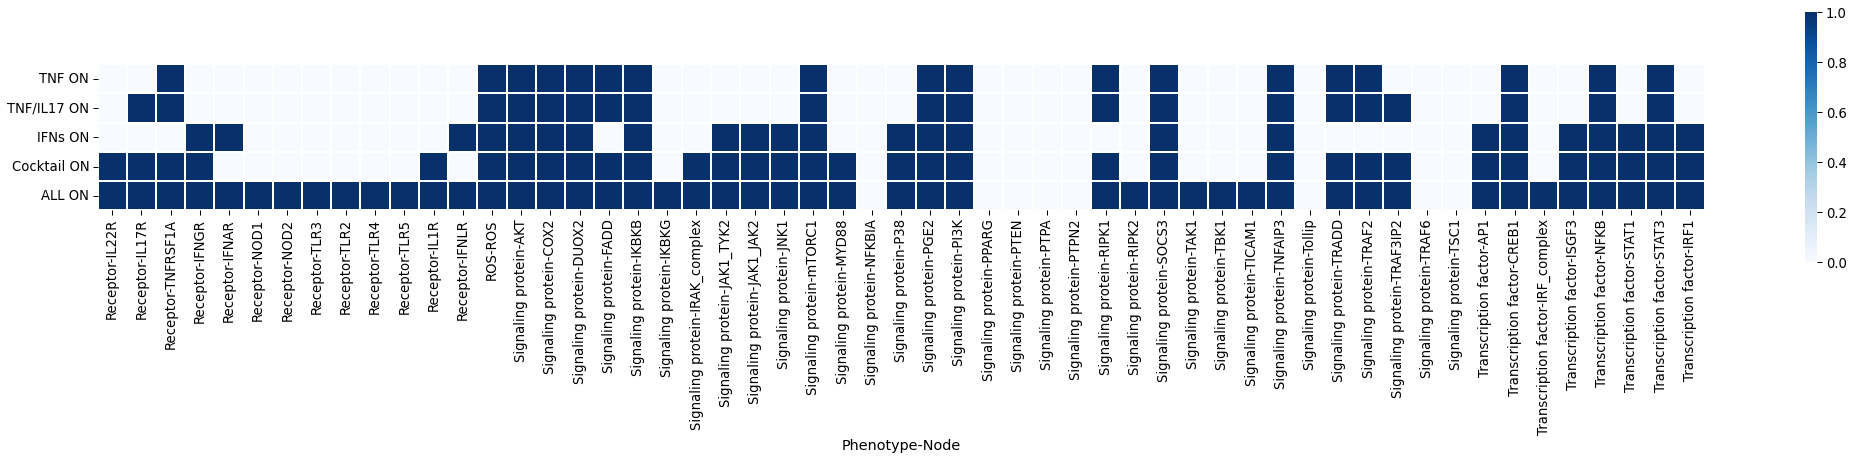

In [23]:
frames = [rTNF_fp, rTNF_IL17_fp, rIFNs_fp, rcocktail_fp, rALL_fp]
all_results = pd.concat(frames, keys=["TNF ON","TNF/IL17 ON","IFNs ON", "Cocktail ON", "ALL ON"] )
all_results.index = all_results.index.droplevel(1)

print("Figure 12. Results of the stable state analysis with regulators as output ")
fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

f = sns.heatmap(all_results, cmap = "Blues", square = True, linewidth=0.3, cbar_kws={"shrink": .1})
#plt.show()
f.figure.savefig('stable_states_regulators.png')

Figure 13. Results of the stable state analysis with markers as output


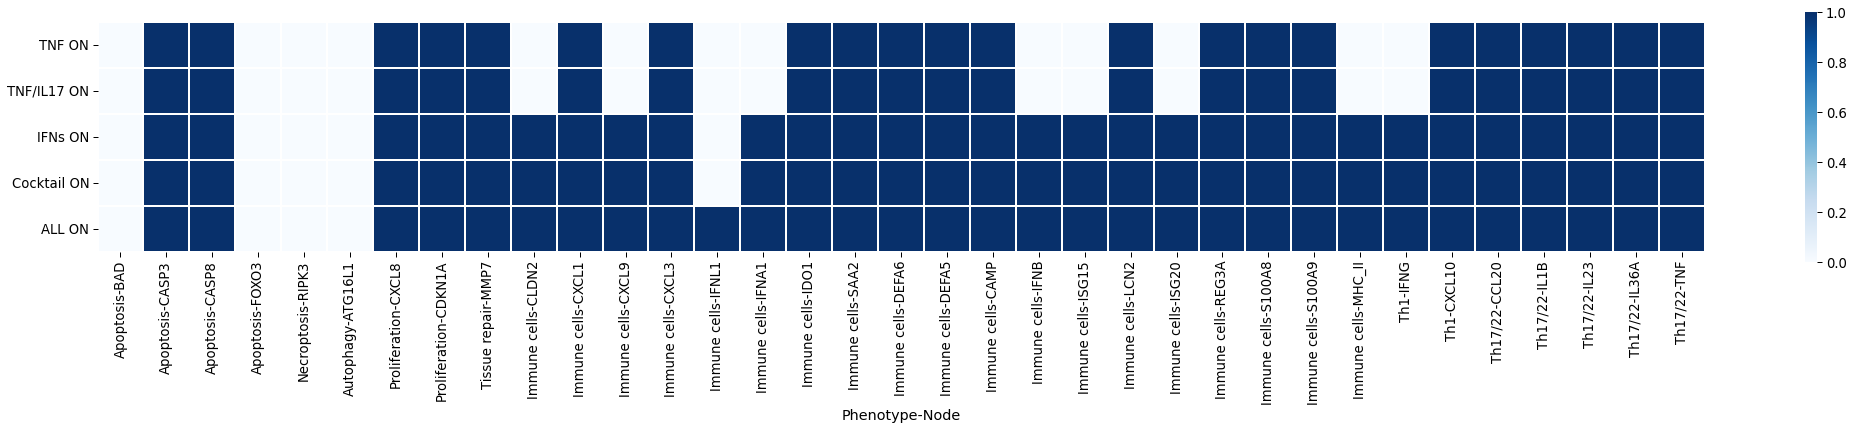

In [24]:
frames = [TNF_fp, TNF_IL17_fp, IFNs_fp, cocktail_fp, ALL_fp]
all_results = pd.concat(frames, keys=["TNF ON","TNF/IL17 ON","IFNs ON", "Cocktail ON", "ALL ON"] )
all_results.index = all_results.index.droplevel(1)

print("Figure 13. Results of the stable state analysis with markers as output")
fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

f = sns.heatmap(all_results, cmap = "Blues", square = True, linewidth=0.3, cbar_kws={"shrink": .1})
#plt.show()
f.figure.savefig('stable_states.png')

### Heat map of DEGs in patient-derived colonoids

Figure 14. Heat map of the logFC-value of regulators


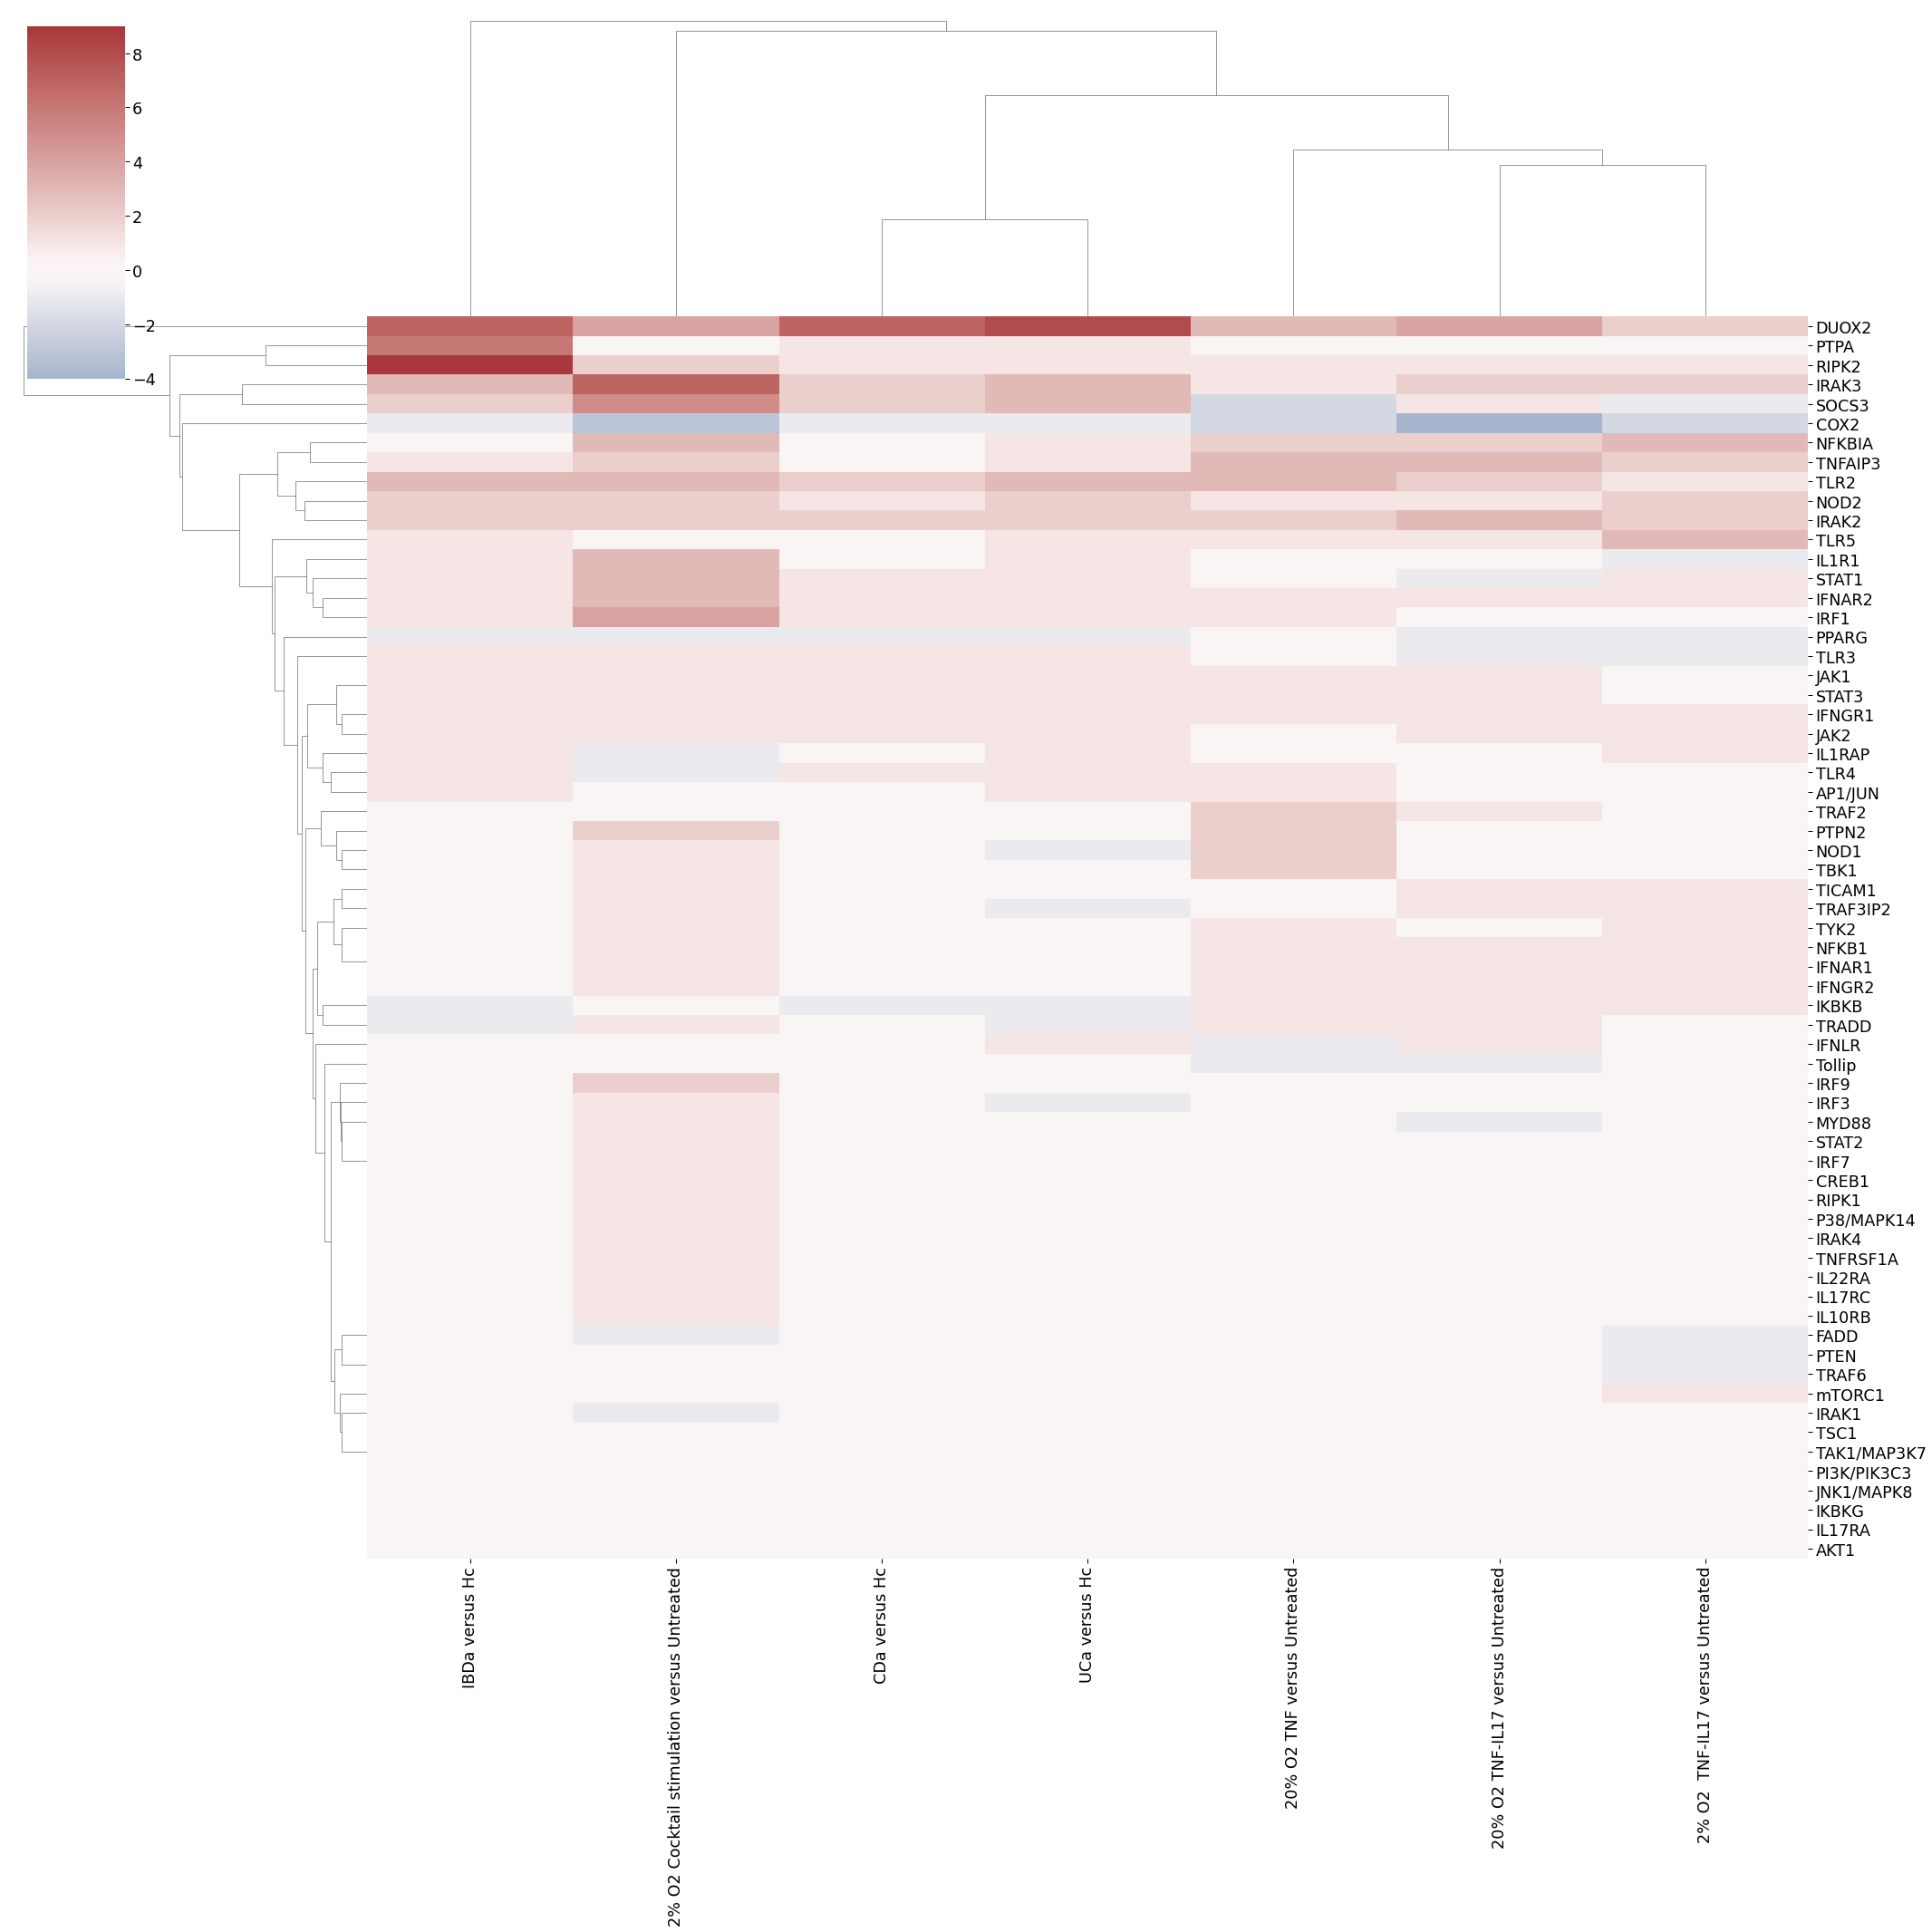

In [54]:

data = []
genes = []

first = True

with open('Expression_regulators.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter = ';')
   
    for row in csv_reader:
        if first:
            sample_names = row[1:]
            first = False
     
        
        else: 
            genes.append(row[0])
            data.append(row[1:])
            

            
data = np.array(data).astype(int)

print('Figure 14. Heat map of the logFC-value of regulators')


sns.set_context("paper", font_scale = 2.0)


sns_plot = sns.clustermap(data, xticklabels =sample_names, yticklabels = genes, figsize=(30,30), cmap = "vlag",center=0)
#sns_plot.savefig("heatmap.pdf")


plt.show()
sns_plot.figure.savefig('Heatmap_regulators.png')

Figure 15. Heat map of the logFC-value of markers


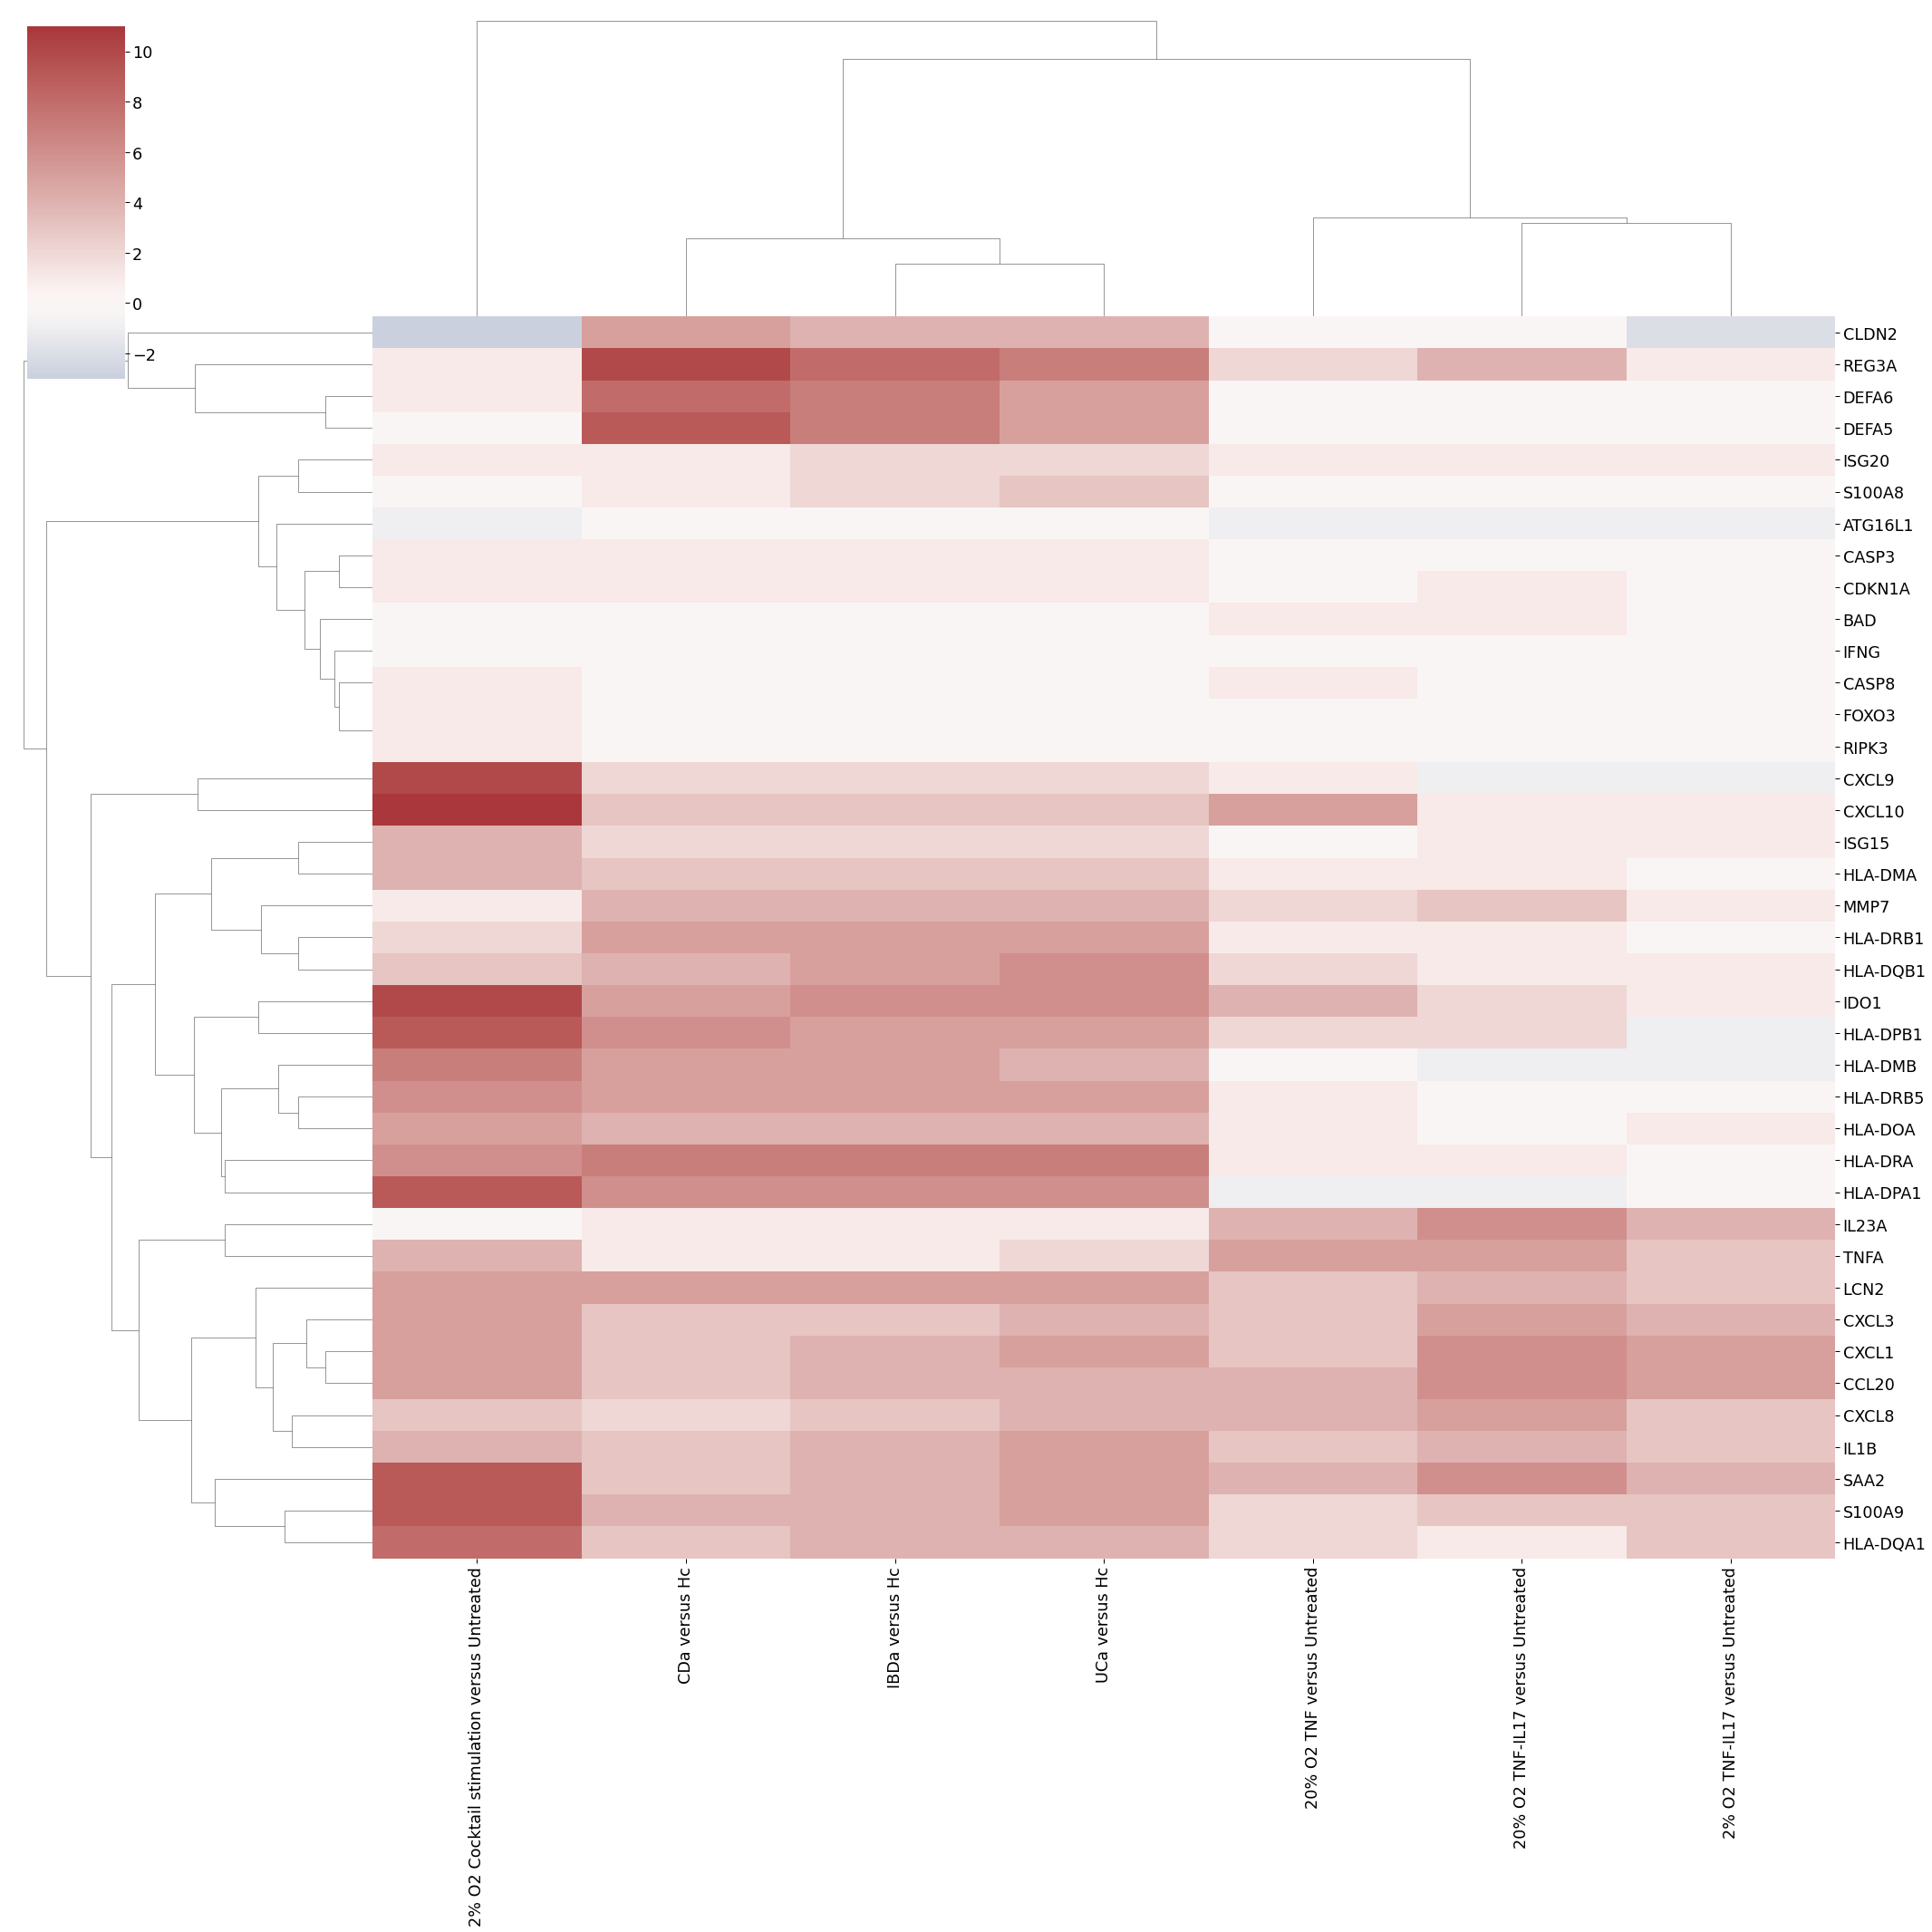

In [55]:

data = []
genes = []

first = True

with open('Expression_data.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter = ';')
    
    for row in csv_reader:
        if first:
            sample_names = row[1:]
            first = False
        
        
        else: 
            genes.append(row[0])
            data.append(row[1:])
            

            
data = np.array(data).astype(int)

print('Figure 15. Heat map of the logFC-value of markers')


sns.set_context("paper", font_scale = 2.0)


sns_plot = sns.clustermap(data, xticklabels =sample_names, yticklabels = genes, figsize=(30,30), cmap = "vlag", center=0)
#sns_plot.savefig("heatmap.pdf")


plt.show()
sns_plot.figure.savefig('Heatmap.png')


## Perturbation analysis

In [28]:
#Define perturbations and inputs
anti_TNF = biolqm.perturbation(lqm_model, "TNF_e%0")
anti_JAK2 = biolqm.perturbation(lqm_model, "JAK1_JAK2%0")
COMBO = biolqm.perturbation(lqm_model, "TNF_e%0 JAK1_JAK2%0")



The code below performs perturbation simulations for the same intial conditions used in the stable state analysis (TNF, TNF+IL17, IFNs, Cocktail and ALL). The defined perturbations are:

- anti_TNF: Inhibition of TNF
- anti_JAK2: Inhibition of JAK2 (Do not want to inhibit signaling through IFNa/b/lambda due to their potential protective properties in IECs)
- COMBO: Combination of anti_TNF and anti_JAK2


In [29]:
# Identify all stable states
anti_TNF_fps = biolqm.fixpoints(anti_TNF) 
anti_TNF_fps_df = pd.DataFrame(anti_TNF_fps)

#anti_JAK2_fps = biolqm.fixpoints(anti_JAK2)
#anti_JAK2_fps_df = pd.DataFrame(anti_JAK2_fps)

#COMBO_fps = biolqm.fixpoints(COMBO)
#COMBO_fps_df = pd.DataFrame(COMBO_fps)


In [30]:
anti_JAK2_fps = biolqm.fixpoints(anti_JAK2)
anti_JAK2_fps_df = pd.DataFrame(anti_JAK2_fps)


In [31]:

COMBO_fps = biolqm.fixpoints(COMBO)
COMBO_fps_df = pd.DataFrame(COMBO_fps)

In [32]:
# Perform perturbation analysis for Th17 cytokines
anti_TNF_TNF_fp = anti_TNF_fps_df.query(inpTNF) 
anti_TNF_TNF = anti_TNF_TNF_fp[markers] 
anti_TNF_TNF.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_TNF_TNF_df = pd.DataFrame(anti_TNF_TNF)

 
anti_JAK2_TNF_fp = anti_JAK2_fps_df.query(inpTNF) 
anti_JAK2_TNF = anti_JAK2_TNF_fp[markers] 
anti_JAK2_TNF.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_JAK2_TNF_df = pd.DataFrame(anti_JAK2_TNF)

COMBO_TNF_fp = COMBO_fps_df.query(inpTNF)
COMBO_TNF = COMBO_TNF_fp[markers] 
COMBO_TNF.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
COMBO_TNF_df = pd.DataFrame(COMBO_TNF)


frames_TNF = [anti_TNF_TNF_df, anti_JAK2_TNF_df, COMBO_TNF_df]
pert_TNF = pd.concat(frames_TNF, keys=["anti_TNF_TNF", "anti_JAK2_TNF", "COMBO_TNF"])
print("Figure 16. States of markers after the in silico treatment of TNF-stimulated IECs")
pert_TNF

Figure 16. States of markers after the in silico treatment of TNF-stimulated IECs


Phenotype        Apoptosis                   Necroptosis Autophagy  \
Node                   BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1   
anti_JAK2_TNF 10         0     1     1     0           0         0   

Phenotype        Proliferation        Tissue repair Immune cells              \
Node                     CXCL8 CDKN1A          MMP7        CLDN2 CXCL1 CXCL9   
anti_JAK2_TNF 10             1      1             1            0     1     0   

Phenotype                                                                      \
Node             CXCL3 IFNL1 IFNA1 IDO1 SAA2 DEFA6 DEFA5 CAMP IFNB ISG15 LCN2   
anti_JAK2_TNF 10     1     0     0    1    1     1     1    1    0     0    1   

Phenotype                                          Th1        Th17/22       \
Node             ISG20 REG3A S100A8 S100A9 MHC_II IFNG CXCL10   CCL20 IL1B   
anti_JAK2_TNF 10     0     1      1      1      0    0      1       1    1   

Phenotype                        
Node             IL23 IL36A TNF  
anti_JAK2_TNF 10    1     1   1

In [33]:
# Perform perturbation analysis for Th17 cytokines
ranti_TNF_TNF_fp = anti_TNF_fps_df.query(inpTNF) 
ranti_TNF_TNF = ranti_TNF_TNF_fp[regulators] 
ranti_TNF_TNF.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
ranti_TNF_TNF_df = pd.DataFrame(ranti_TNF_TNF)
 
ranti_JAK2_TNF_fp = anti_JAK2_fps_df.query(inpTNF) 
ranti_JAK2_TNF = ranti_JAK2_TNF_fp[regulators] 
ranti_JAK2_TNF.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
ranti_JAK2_TNF_df = pd.DataFrame(ranti_JAK2_TNF)

rCOMBO_TNF_fp = COMBO_fps_df.query(inpTNF)
rCOMBO_TNF = rCOMBO_TNF_fp[regulators] 
rCOMBO_TNF.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
rCOMBO_TNF_df = pd.DataFrame(rCOMBO_TNF)


frames_TNF = [ranti_TNF_TNF_df, ranti_JAK2_TNF_df, rCOMBO_TNF_df]
rpert_TNF = pd.concat(frames_TNF, keys=["anti_TNF_TNF", "anti_JAK2_TNF", "COMBO_TNF"])
print("Figure 17. States of regulators after the in silico treatment of TNF-stimulated IECs")
rpert_TNF

Figure 17. States of regulators after the in silico treatment of TNF-stimulated IECs


Phenotype        Receptor                                                      \
Node                IL22R IL17R TNFRSF1A IFNGR IFNAR NOD1 NOD2 TLR3 TLR2 TLR4   
anti_JAK2_TNF 10        0     0        1     0     0    0    0    0    0    0   

Phenotype                        ROS Signaling protein                        \
Node             TLR5 IL1R IFNLR ROS               AKT COX2 DUOX2 FADD IKBKB   
anti_JAK2_TNF 10    0    0     0   1                 1    1     1    1     1   

Phenotype                                                                  \
Node             IKBKG IRAK_complex JAK1_TYK2 JAK1_JAK2 JNK1 mTORC1 MYD88   
anti_JAK2_TNF 10     0            0         0         0    0      1     0   

Phenotype                                                                      \
Node             NFKBIA P38 PGE2 PI3K PPARG PTEN PTPA PTPN2 RIPK1 RIPK2 SOCS3   
anti_JAK2_TNF 10      0   0    1    1     0    0    0     0     1     0     1   

Phenotype                                                                    \
Node             TAK1 TBK1 TICAM1 TNFAIP3 Tollip TRADD TRAF2 TRAF3IP2 TRAF6   
anti_JAK2_TNF 10    0    0      0       1      0     1     1        0     0   

Phenotype             Transcription factor                                     \
Node             TSC1                  AP1 CREB1 IRF_complex ISGF3 NFKB STAT1   
anti_JAK2_TNF 10    0                    0     1           0     0    1     0   

Phenotype                    
Node             STAT3 IRF1  
anti_JAK2_TNF 10     1    0

In [34]:
# Perform perturbation analysis for Th1 cytokines
anti_TNF_TNF_IL17_fp = anti_TNF_fps_df.query(inpTNF_IL17) 
anti_TNF_TNF_IL17 = anti_TNF_TNF_IL17_fp[markers] 
anti_TNF_TNF_IL17.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_TNF_TNF_IL17_df = pd.DataFrame(anti_TNF_TNF_IL17)
 
anti_JAK2_TNF_IL17_fp = anti_JAK2_fps_df.query(inpTNF_IL17) 
anti_JAK2_TNF_IL17 = anti_JAK2_TNF_IL17_fp[markers] 
anti_JAK2_TNF_IL17.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_JAK2_TNF_IL17_df = pd.DataFrame(anti_JAK2_TNF_IL17)

COMBO_TNF_IL17_fp = COMBO_fps_df.query(inpTNF_IL17)
COMBO_TNF_IL17 = COMBO_TNF_IL17_fp[markers] 
COMBO_TNF_IL17.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
COMBO_TNF_IL17_df = pd.DataFrame(COMBO_TNF_IL17)


frames_TNF_IL17 = [anti_TNF_TNF_IL17_df, anti_JAK2_TNF_IL17_df, COMBO_TNF_IL17_df]
pert_TNF_IL17 = pd.concat(frames_TNF_IL17, keys=["anti_TNF_TNF_IL17", "anti_JAK2_TNF_IL17", "COMBO_TNF_IL17"])
print("Figure 18. States of markers after the in silico treatment of  TNF and IL17-stimulated IECs")
pert_TNF_IL17

Figure 18. States of markers after the in silico treatment of  TNF and IL17-stimulated IECs


Phenotype             Apoptosis                   Necroptosis Autophagy  \
Node                        BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1   
anti_JAK2_TNF_IL17 14         0     1     1     0           0         0   

Phenotype             Proliferation        Tissue repair Immune cells        \
Node                          CXCL8 CDKN1A          MMP7        CLDN2 CXCL1   
anti_JAK2_TNF_IL17 14             1      1             1            0     1   

Phenotype                                                                      \
Node                  CXCL9 CXCL3 IFNL1 IFNA1 IDO1 SAA2 DEFA6 DEFA5 CAMP IFNB   
anti_JAK2_TNF_IL17 14     0     1     0     0    1    1     1     1    1    0   

Phenotype                                                          Th1         \
Node                  ISG15 LCN2 ISG20 REG3A S100A8 S100A9 MHC_II IFNG CXCL10   
anti_JAK2_TNF_IL17 14     0    1     0     1      1      1      0    0      1   

Phenotype             Th17/22                      
Node                    CCL20 IL1B IL23 IL36A TNF  
anti_JAK2_TNF_IL17 14       1    1    1     1   1

In [35]:
# Perform perturbation analysis for Th1 cytokines
ranti_TNF_TNF_IL17_fp = anti_TNF_fps_df.query(inpTNF_IL17) 
ranti_TNF_TNF_IL17 = ranti_TNF_TNF_IL17_fp[regulators] 
ranti_TNF_TNF_IL17.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
ranti_TNF_TNF_IL17_df = pd.DataFrame(ranti_TNF_TNF_IL17)
 
ranti_JAK2_TNF_IL17_fp = anti_JAK2_fps_df.query(inpTNF_IL17) 
ranti_JAK2_TNF_IL17 = ranti_JAK2_TNF_IL17_fp[regulators] 
ranti_JAK2_TNF_IL17.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
ranti_JAK2_TNF_IL17_df = pd.DataFrame(ranti_JAK2_TNF_IL17)

rCOMBO_TNF_IL17_fp = COMBO_fps_df.query(inpTNF_IL17)
rCOMBO_TNF_IL17 = rCOMBO_TNF_IL17_fp[regulators] 
rCOMBO_TNF_IL17.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
rCOMBO_TNF_IL17_df = pd.DataFrame(rCOMBO_TNF_IL17)


frames_TNF_IL17 = [ranti_TNF_TNF_IL17_df, ranti_JAK2_TNF_IL17_df, rCOMBO_TNF_IL17_df]
rpert_TNF_IL17 = pd.concat(frames_TNF, keys=["anti_TNF_TNF_IL17", "anti_JAK2_TNF_IL17", "COMBO_TNF_IL17"])
print("Figure 19. States of regulators after the in silico treatment of  TNF and IL17-stimulated IECs")
rpert_TNF_IL17

Figure 19. States of regulators after the in silico treatment of  TNF and IL17-stimulated IECs


Phenotype             Receptor                                                 \
Node                     IL22R IL17R TNFRSF1A IFNGR IFNAR NOD1 NOD2 TLR3 TLR2   
anti_JAK2_TNF_IL17 10        0     0        1     0     0    0    0    0    0   

Phenotype                                  ROS Signaling protein             \
Node                  TLR4 TLR5 IL1R IFNLR ROS               AKT COX2 DUOX2   
anti_JAK2_TNF_IL17 10    0    0    0     0   1                 1    1     1   

Phenotype                                                                     \
Node                  FADD IKBKB IKBKG IRAK_complex JAK1_TYK2 JAK1_JAK2 JNK1   
anti_JAK2_TNF_IL17 10    1     1     0            0         0         0    0   

Phenotype                                                                      \
Node                  mTORC1 MYD88 NFKBIA P38 PGE2 PI3K PPARG PTEN PTPA PTPN2   
anti_JAK2_TNF_IL17 10      1     0      0   0    1    1     0    0    0     0   

Phenotype                                                                      \
Node                  RIPK1 RIPK2 SOCS3 TAK1 TBK1 TICAM1 TNFAIP3 Tollip TRADD   
anti_JAK2_TNF_IL17 10     1     0     1    0    0      0       1      0     1   

Phenotype                                       Transcription factor        \
Node                  TRAF2 TRAF3IP2 TRAF6 TSC1                  AP1 CREB1   
anti_JAK2_TNF_IL17 10     1        0     0    0                    0     1   

Phenotype                                                      
Node                  IRF_complex ISGF3 NFKB STAT1 STAT3 IRF1  
anti_JAK2_TNF_IL17 10           0     0    1     0     1    0

In [36]:
# Perform perturbation analysis for Th17 cytokines
anti_TNF_IFNs_fp = anti_TNF_fps_df.query(inpIFNs) 
anti_TNF_IFNs = anti_TNF_IFNs_fp[markers] 
anti_TNF_IFNs.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_TNF_IFNs_df = pd.DataFrame(anti_TNF_IFNs)
anti_TNF_IFNs_df = anti_TNF_IFNs_df.drop_duplicates()

 
anti_JAK2_IFNs_fp = anti_JAK2_fps_df.query(inpIFNs) 
anti_JAK2_IFNs = anti_JAK2_IFNs_fp[markers] 
anti_JAK2_IFNs.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_JAK2_IFNs_df = pd.DataFrame(anti_JAK2_IFNs)
anti_JAK2_IFNs_df = anti_JAK2_IFNs_df.drop_duplicates()

COMBO_IFNs_fp = COMBO_fps_df.query(inpIFNs)
COMBO_IFNs = COMBO_IFNs_fp[markers] 
COMBO_IFNs.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
COMBO_IFNs_df = pd.DataFrame(COMBO_IFNs)
COMBO_IFNs_df = COMBO_IFNs_df.drop_duplicates()


frames_IFNs = [anti_TNF_IFNs_df, anti_JAK2_IFNs_df, COMBO_IFNs_df]
pert_IFNs= pd.concat(frames_IFNs, keys=["anti_TNF_IFNs", "anti_JAK2_IFNs", "COMBO_IFNs"])
print("Figure 20. States of markers after the in silico treatment of IFNs-stimulated IECs")
pert_IFNs

Figure 20. States of markers after the in silico treatment of IFNs-stimulated IECs


Phenotype         Apoptosis                   Necroptosis Autophagy  \
Node                    BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1   
anti_TNF_IFNs  36         0     1     1     0           0         0   
anti_JAK2_IFNs 45         0     1     1     0           0         0   
COMBO_IFNs     37         0     1     1     0           0         0   

Phenotype         Proliferation        Tissue repair Immune cells              \
Node                      CXCL8 CDKN1A          MMP7        CLDN2 CXCL1 CXCL9   
anti_TNF_IFNs  36             1      1             1            1     1     1   
anti_JAK2_IFNs 45             1      1             1            1     1     1   
COMBO_IFNs     37             1      1             1            1     1     1   

Phenotype                                                                  \
Node              CXCL3 IFNL1 IFNA1 IDO1 SAA2 DEFA6 DEFA5 CAMP IFNB ISG15   
anti_TNF_IFNs  36     1     0     1    1    1     1     1    1    1     1   
anti_JAK2_IFNs 45     1     0     1    1    1     1     1    1    1     1   
COMBO_IFNs     37     1     0     1    1    1     1     1    1    1     1   

Phenotype                                                Th1        Th17/22  \
Node              LCN2 ISG20 REG3A S100A8 S100A9 MHC_II IFNG CXCL10   CCL20   
anti_TNF_IFNs  36    1     1     1      1      1      1    1      1       1   
anti_JAK2_IFNs 45    1     1     1      1      1      1    1      1       1   
COMBO_IFNs     37    1     1     1      1      1      1    1      1       1   

Phenotype                              
Node              IL1B IL23 IL36A TNF  
anti_TNF_IFNs  36    1    1     1   1  
anti_JAK2_IFNs 45    1    1     1   1  
COMBO_IFNs     37    1    1     1   1

In [37]:
# Perform perturbation analysis for Th17 cytokines
ranti_TNF_IFNs_fp = anti_TNF_fps_df.query(inpIFNs) 
ranti_TNF_IFNs = ranti_TNF_IFNs_fp[regulators] 
ranti_TNF_IFNs.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
ranti_TNF_IFNs_df = pd.DataFrame(ranti_TNF_IFNs)
ranti_TNF_IFNs_df = ranti_TNF_IFNs_df.drop_duplicates()

 
ranti_JAK2_IFNs_fp = anti_JAK2_fps_df.query(inpIFNs) 
ranti_JAK2_IFNs = ranti_JAK2_IFNs_fp[regulators] 
ranti_JAK2_IFNs.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
ranti_JAK2_IFNs_df = pd.DataFrame(ranti_JAK2_IFNs)
ranti_JAK2_IFNs_df = ranti_JAK2_IFNs_df.drop_duplicates()

rCOMBO_IFNs_fp = COMBO_fps_df.query(inpIFNs)
rCOMBO_IFNs = rCOMBO_IFNs_fp[regulators] 
rCOMBO_IFNs.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
rCOMBO_IFNs_df = pd.DataFrame(rCOMBO_IFNs)
rCOMBO_IFNs_df = rCOMBO_IFNs_df.drop_duplicates()


frames_IFNs = [ranti_TNF_IFNs_df, ranti_JAK2_IFNs_df, rCOMBO_IFNs_df]
pert_IFNs= pd.concat(frames_IFNs, keys=["anti_TNF_IFNs", "anti_JAK2_IFNs", "COMBO_IFNs"])
print("Figure 21. States of regulators after the in silico treatment of IFNs-stimulated IECs")
pert_IFNs

Figure 21. States of regulators after the in silico treatment of IFNs-stimulated IECs


Phenotype         Receptor                                                 \
Node                 IL22R IL17R TNFRSF1A IFNGR IFNAR NOD1 NOD2 TLR3 TLR2   
anti_TNF_IFNs  36        0     0        0     1     1    0    0    0    0   
anti_JAK2_IFNs 45        0     0        0     1     1    0    0    0    0   
COMBO_IFNs     37        0     0        0     1     1    0    0    0    0   

Phenotype                              ROS Signaling protein                  \
Node              TLR4 TLR5 IL1R IFNLR ROS               AKT COX2 DUOX2 FADD   
anti_TNF_IFNs  36    0    0    0     1   1                 1    1     1    0   
anti_JAK2_IFNs 45    0    0    0     1   1                 1    1     1    0   
COMBO_IFNs     37    0    0    0     1   1                 1    1     1    0   

Phenotype                                                                   \
Node              IKBKB IKBKG IRAK_complex JAK1_TYK2 JAK1_JAK2 JNK1 mTORC1   
anti_TNF_IFNs  36     1     0            0         1         1    1      1   
anti_JAK2_IFNs 45     1     0            0         1         0    1      1   
COMBO_IFNs     37     1     0            0         1         0    1      1   

Phenotype                                                                 \
Node              MYD88 NFKBIA P38 PGE2 PI3K PPARG PTEN PTPA PTPN2 RIPK1   
anti_TNF_IFNs  36     0      0   1    1    1     0    0    0     0     0   
anti_JAK2_IFNs 45     0      0   1    1    1     0    0    0     0     0   
COMBO_IFNs     37     0      0   1    1    1     0    0    0     0     0   

Phenotype                                                                  \
Node              RIPK2 SOCS3 TAK1 TBK1 TICAM1 TNFAIP3 Tollip TRADD TRAF2   
anti_TNF_IFNs  36     0     1    0    0      0       1      0     0     0   
anti_JAK2_IFNs 45     0     1    0    0      0       1      0     0     0   
COMBO_IFNs     37     0     1    0    0      0       1      0     0     0   

Phenotype                             Transcription factor                    \
Node              TRAF3IP2 TRAF6 TSC1                  AP1 CREB1 IRF_complex   
anti_TNF_IFNs  36        0     0    0                    1     1           0   
anti_JAK2_IFNs 45        0     0    0                    1     1           0   
COMBO_IFNs     37        0     0    0                    1     1           0   

Phenotype                                      
Node              ISGF3 NFKB STAT1 STAT3 IRF1  
anti_TNF_IFNs  36     1    1     1     1    1  
anti_JAK2_IFNs 45     1    1     1     1    1  
COMBO_IFNs     37     1    1     1     1    1

In [38]:
# Perform perturbation analysis for Th1 and Th17 cytokines
anti_TNF_cocktail_fp = anti_TNF_fps_df.query(inpcocktail) 
anti_TNF_cocktail = anti_TNF_cocktail_fp[markers] 
anti_TNF_cocktail.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_TNF_cocktail_df = pd.DataFrame(anti_TNF_cocktail)
 
anti_JAK2_cocktail_fp = anti_JAK2_fps_df.query(inpcocktail) 
anti_JAK2_cocktail = anti_JAK2_cocktail_fp[markers] 
anti_JAK2_cocktail.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_JAK2_cocktail_df = pd.DataFrame(anti_JAK2_cocktail)

COMBO_cocktail_fp = COMBO_fps_df.query(inpcocktail)
COMBO_cocktail = COMBO_cocktail_fp[markers] 
COMBO_cocktail.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
COMBO_cocktail_df = pd.DataFrame(COMBO_cocktail)



frames_cocktail = [anti_TNF_cocktail_df, anti_JAK2_cocktail_df, COMBO_cocktail_df]
pert_cocktail = pd.concat(frames_cocktail, keys=["anti_TNF_cocktail", "anti_JAK2_cocktail", "COMBO_cocktail",])
print("Figure 22. States of markers after the in silico treatment of cocktail-stimulated IECs")
pert_cocktail

Figure 22. States of markers after the in silico treatment of cocktail-stimulated IECs


Phenotype              Apoptosis                   Necroptosis Autophagy  \
Node                         BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1   
anti_JAK2_cocktail 710         0     1     1     0           0         0   

Phenotype              Proliferation        Tissue repair Immune cells        \
Node                           CXCL8 CDKN1A          MMP7        CLDN2 CXCL1   
anti_JAK2_cocktail 710             1      1             1            1     1   

Phenotype                                                                  \
Node                   CXCL9 CXCL3 IFNL1 IFNA1 IDO1 SAA2 DEFA6 DEFA5 CAMP   
anti_JAK2_cocktail 710     1     1     0     1    1    1     1     1    1   

Phenotype                                                                Th1  \
Node                   IFNB ISG15 LCN2 ISG20 REG3A S100A8 S100A9 MHC_II IFNG   
anti_JAK2_cocktail 710    1     1    1     1     1      1      1      1    1   

Phenotype                     Th17/22                      
Node                   CXCL10   CCL20 IL1B IL23 IL36A TNF  
anti_JAK2_cocktail 710      1       1    1    1     1   1

In [40]:
# Perform perturbation analysis for Th1 and Th17 cytokines
ranti_TNF_cocktail_fp = anti_TNF_fps_df.query(inpcocktail) 
ranti_TNF_cocktail = ranti_TNF_cocktail_fp[regulators] 
ranti_TNF_cocktail.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
ranti_TNF_cocktail_df = pd.DataFrame(ranti_TNF_cocktail)
 
ranti_JAK2_cocktail_fp = anti_JAK2_fps_df.query(inpcocktail) 
ranti_JAK2_cocktail = ranti_JAK2_cocktail_fp[regulators] 
ranti_JAK2_cocktail.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
ranti_JAK2_cocktail_df = pd.DataFrame(ranti_JAK2_cocktail)

rCOMBO_cocktail_fp = COMBO_fps_df.query(inpcocktail)
rCOMBO_cocktail = rCOMBO_cocktail_fp[regulators] 
rCOMBO_cocktail.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
rCOMBO_cocktail_df = pd.DataFrame(rCOMBO_cocktail)



frames_cocktail = [ranti_TNF_cocktail_df, ranti_JAK2_cocktail_df, rCOMBO_cocktail_df]
pert_cocktail = pd.concat(frames_cocktail, keys=["anti_TNF_cocktail", "anti_JAK2_cocktail", "COMBO_cocktail",])
print("Figure 23. States of regulators after the in silico treatment of cocktail-stimulated IECs")
pert_cocktail

Figure 23. States of regulators after the in silico treatment of cocktail-stimulated IECs


Phenotype              Receptor                                            \
Node                      IL22R IL17R TNFRSF1A IFNGR IFNAR NOD1 NOD2 TLR3   
anti_JAK2_cocktail 710        1     1        1     1     0    0    0    0   

Phenotype                                        ROS Signaling protein       \
Node                   TLR2 TLR4 TLR5 IL1R IFNLR ROS               AKT COX2   
anti_JAK2_cocktail 710    0    0    0    1     0   1                 1    1   

Phenotype                                                             \
Node                   DUOX2 FADD IKBKB IKBKG IRAK_complex JAK1_TYK2   
anti_JAK2_cocktail 710     1    1     1     0            1         1   

Phenotype                                                                      \
Node                   JAK1_JAK2 JNK1 mTORC1 MYD88 NFKBIA P38 PGE2 PI3K PPARG   
anti_JAK2_cocktail 710         0    1      1     1      0   1    1    1     0   

Phenotype                                                                  \
Node                   PTEN PTPA PTPN2 RIPK1 RIPK2 SOCS3 TAK1 TBK1 TICAM1   
anti_JAK2_cocktail 710    0    0     0     1     0     1    0    0      0   

Phenotype                                                              \
Node                   TNFAIP3 Tollip TRADD TRAF2 TRAF3IP2 TRAF6 TSC1   
anti_JAK2_cocktail 710       1      0     1     1        1     0    0   

Phenotype              Transcription factor                               \
Node                                    AP1 CREB1 IRF_complex ISGF3 NFKB   
anti_JAK2_cocktail 710                    1     1           0     1    1   

Phenotype                                
Node                   STAT1 STAT3 IRF1  
anti_JAK2_cocktail 710     1     1    1

In [41]:
# Perform perturbation analysis for PRR signalling
anti_TNF_ALL_fp = anti_TNF_fps_df.query(inpALL) 
anti_TNF_ALL = anti_TNF_ALL_fp[markers] 
anti_TNF_ALL.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_TNF_ALL_df = pd.DataFrame(anti_TNF_ALL)

 
anti_JAK2_ALL_fp = anti_JAK2_fps_df.query(inpALL) 
anti_JAK2_ALL = anti_JAK2_ALL_fp[markers] 
anti_JAK2_ALL.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
anti_JAK2_ALL_df = pd.DataFrame(anti_JAK2_ALL)
anti_JAK2_ALL_df = anti_JAK2_ALL_df.drop_duplicates()



COMBO_ALL_fp = COMBO_fps_df.query(inpALL)
COMBO_ALL = COMBO_ALL_fp[markers] 
COMBO_ALL.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])
COMBO_ALL_df = pd.DataFrame(COMBO_ALL)
COMBO_ALL_df = COMBO_ALL_df.drop_duplicates()



frames_ALL = [anti_TNF_ALL_df, anti_JAK2_ALL_df, COMBO_ALL_df]
pert_ALL = pd.concat(frames_ALL, keys=["anti_TNF_ALL", "anti_JAK2_ALL", "COMBO_ALL"])
print("Figure 24. States of markers after the in silico treatment of ALL inputs-stimulated IECs")
pert_ALL

Figure 24. States of markers after the in silico treatment of ALL inputs-stimulated IECs


Phenotype           Apoptosis                   Necroptosis Autophagy  \
Node                      BAD CASP3 CASP8 FOXO3       RIPK3   ATG16L1   
anti_JAK2_ALL 16129         0     1     1     0           0         0   

Phenotype           Proliferation        Tissue repair Immune cells        \
Node                        CXCL8 CDKN1A          MMP7        CLDN2 CXCL1   
anti_JAK2_ALL 16129             1      1             1            1     1   

Phenotype                                                                    \
Node                CXCL9 CXCL3 IFNL1 IFNA1 IDO1 SAA2 DEFA6 DEFA5 CAMP IFNB   
anti_JAK2_ALL 16129     1     1     1     1    1    1     1     1    1    1   

Phenotype                                                        Th1         \
Node                ISG15 LCN2 ISG20 REG3A S100A8 S100A9 MHC_II IFNG CXCL10   
anti_JAK2_ALL 16129     1    1     1     1      1      1      1    1      1   

Phenotype           Th17/22                      
Node                  CCL20 IL1B IL23 IL36A TNF  
anti_JAK2_ALL 16129       1    1    1     1   1

In [42]:
# Perform perturbation analysis for PRR signalling
ranti_TNF_ALL_fp = anti_TNF_fps_df.query(inpALL) 
ranti_TNF_ALL = ranti_TNF_ALL_fp[regulators] 
ranti_TNF_ALL.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
ranti_TNF_ALL_df = pd.DataFrame(ranti_TNF_ALL)

 
ranti_JAK2_ALL_fp = anti_JAK2_fps_df.query(inpALL) 
ranti_JAK2_ALL = ranti_JAK2_ALL_fp[regulators] 
ranti_JAK2_ALL.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
ranti_JAK2_ALL_df = pd.DataFrame(ranti_JAK2_ALL)
ranti_JAK2_ALL_df = ranti_JAK2_ALL_df.drop_duplicates()



rCOMBO_ALL_fp = COMBO_fps_df.query(inpALL)
rCOMBO_ALL = rCOMBO_ALL_fp[regulators] 
rCOMBO_ALL.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])
rCOMBO_ALL_df = pd.DataFrame(rCOMBO_ALL)
rCOMBO_ALL_df = rCOMBO_ALL_df.drop_duplicates()





frames_ALL = [ranti_TNF_ALL_df, ranti_JAK2_ALL_df, rCOMBO_ALL_df]
pert_ALL = pd.concat(frames_ALL, keys=["anti_TNF_ALL", "anti_JAK2_ALL", "COMBO_ALL"])
print("Figure 25. States of regulators after the in silico treatment of ALL inputs-stimulated IECs")
pert_ALL

Figure 25. States of regulators after the in silico treatment of ALL inputs-stimulated IECs


Phenotype           Receptor                                                 \
Node                   IL22R IL17R TNFRSF1A IFNGR IFNAR NOD1 NOD2 TLR3 TLR2   
anti_JAK2_ALL 16129        1     1        1     1     1    1    1    1    1   

Phenotype                                ROS Signaling protein             \
Node                TLR4 TLR5 IL1R IFNLR ROS               AKT COX2 DUOX2   
anti_JAK2_ALL 16129    1    1    1     1   1                 1    1     1   

Phenotype                                                                   \
Node                FADD IKBKB IKBKG IRAK_complex JAK1_TYK2 JAK1_JAK2 JNK1   
anti_JAK2_ALL 16129    1     1     1            1         1         0    1   

Phenotype                                                                    \
Node                mTORC1 MYD88 NFKBIA P38 PGE2 PI3K PPARG PTEN PTPA PTPN2   
anti_JAK2_ALL 16129      1     1      0   1    1    1     0    0    0     0   

Phenotype                                                                    \
Node                RIPK1 RIPK2 SOCS3 TAK1 TBK1 TICAM1 TNFAIP3 Tollip TRADD   
anti_JAK2_ALL 16129     1     1     1    1    1      1       1      0     1   

Phenotype                                     Transcription factor        \
Node                TRAF2 TRAF3IP2 TRAF6 TSC1                  AP1 CREB1   
anti_JAK2_ALL 16129     1        1     0    0                    1     1   

Phenotype                                                    
Node                IRF_complex ISGF3 NFKB STAT1 STAT3 IRF1  
anti_JAK2_ALL 16129           1     1    1     1     1    1

#### Heatmap of global and perturbation simulation results

Figure 26. Global simulation and perturbation results of markers


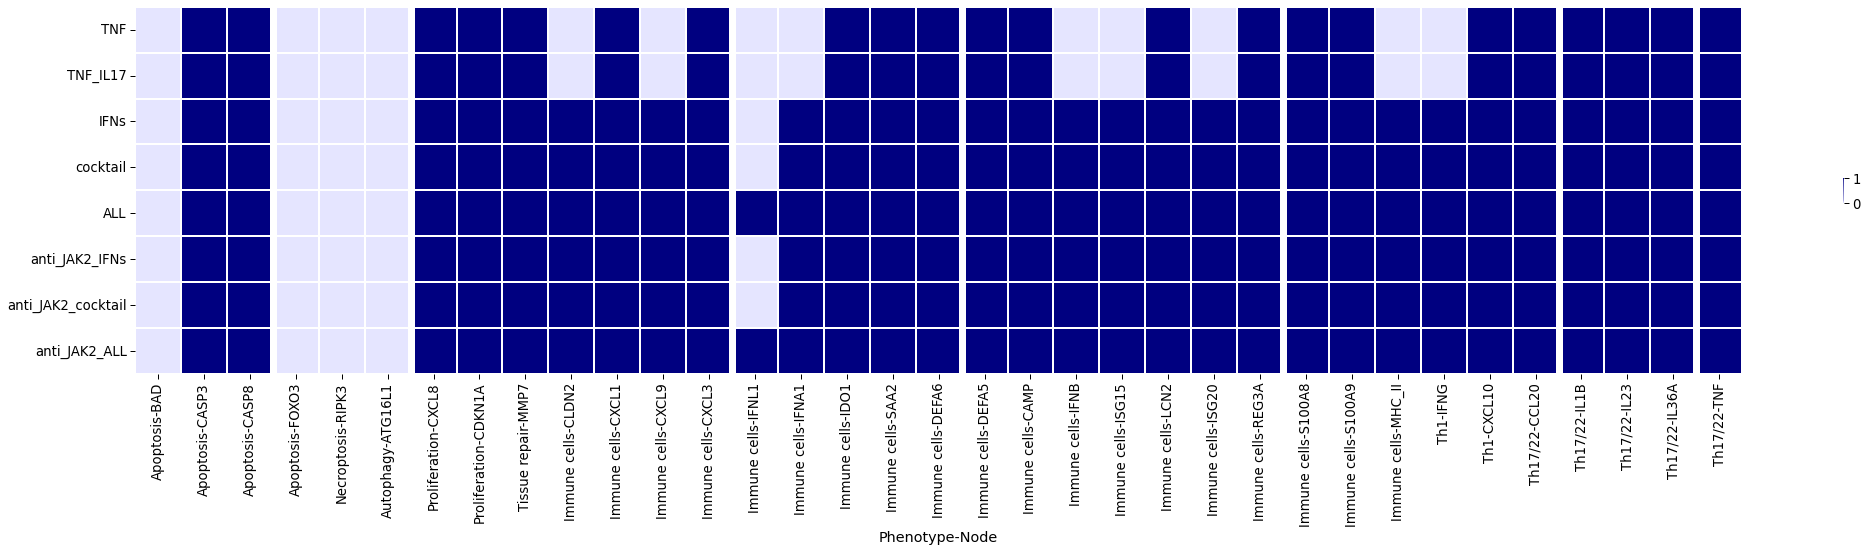

In [44]:
frames = [TNF_fp, TNF_IL17_fp, IFNs_fp, cocktail_fp, ALL_fp,anti_TNF_TNF_IL17_df,anti_TNF_cocktail_df, anti_TNF_ALL_df, anti_JAK2_IFNs_df, anti_JAK2_cocktail_df, anti_JAK2_ALL_df, COMBO_cocktail_df, COMBO_ALL_df]
all_results = pd.concat(frames, keys=["TNF","TNF_IL17", "IFNs", "cocktail", "ALL","anti_TNF_TNF_IL17", "anti_TNF_cocktail", "anti_TNF_ALL", "anti_JAK2_IFNs","anti_JAK2_cocktail", "anti_JAK2_ALL", "COMBO_cocktail", "COMBO_ALL"] )
all_results.index = all_results.index.droplevel(1)
#all_results.columns = all_results.columns.droplevel(0)

print("Figure 26. Global simulation and perturbation results of markers")
fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

#fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

hc = ['#e5e5ff', '#acacdf', '#7272bf', '#39399f', '#000080']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)

f = sns.heatmap(all_results, cmap = cm, square = True, linewidth=0.1, cbar_kws={"shrink": .01})

ax.axvline(3, 0, 5, linewidth=7, c='white')
ax.axvline(6, 0, 5, linewidth=7, c='white')
ax.axvline(13, 0, 5, linewidth=7, c='white')
ax.axvline(18, 0, 5, linewidth=7, c='white')
ax.axvline(25, 0, 5, linewidth=7, c='white')
ax.axvline(31, 0, 5, linewidth=7, c='white')
ax.axvline(34, 0, 5, linewidth=7, c='white')
#f.figure.savefig('simulations.pdf', dpi = 300)

f.figure.savefig('simulations.png')

Figure 27. Global simulation and perturbation results of regulators


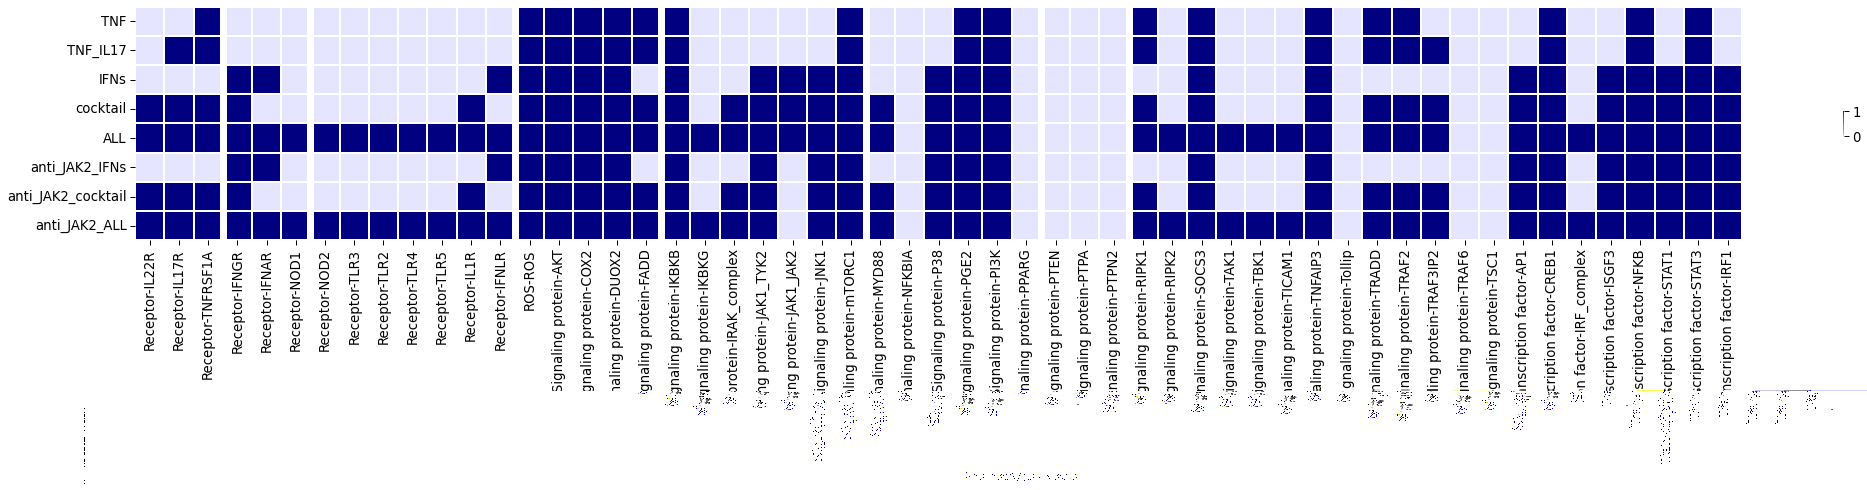

In [45]:
frames = [rTNF_fp, rTNF_IL17_fp, rIFNs_fp, rcocktail_fp, rALL_fp,ranti_TNF_TNF_IL17_df, ranti_TNF_cocktail_df, ranti_TNF_ALL_df, ranti_JAK2_IFNs_df, ranti_JAK2_cocktail_df, ranti_JAK2_ALL_df, rCOMBO_cocktail_df, rCOMBO_ALL_df]
all_results = pd.concat(frames, keys=["TNF","TNF_IL17", "IFNs", "cocktail", "ALL", "anti_TNF_TNF_IL17", "anti_TNF_ALL", "anti_JAK2_TNF_IL17", "anti_JAK2_IFNs","anti_JAK2_cocktail", "anti_JAK2_ALL" , "COMBO_cocktail", "COMBO_ALL"] )
all_results.index = all_results.index.droplevel(1)
#all_results.columns = all_results.columns.droplevel(0)

print("Figure 27. Global simulation and perturbation results of regulators")
fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

#fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

hc = ['#e5e5ff', '#acacdf', '#7272bf', '#39399f', '#000080']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)

f = sns.heatmap(all_results, cmap = cm, square = True, linewidth=0.1, cbar_kws={"shrink": .01})

ax.axvline(3, 0, 5, linewidth=7, c='white')
ax.axvline(6, 0, 5, linewidth=7, c='white')
ax.axvline(13, 0, 5, linewidth=7, c='white')
ax.axvline(18, 0, 5, linewidth=7, c='white')
ax.axvline(25, 0, 5, linewidth=7, c='white')
ax.axvline(31, 0, 5, linewidth=7, c='white')
ax.axvline(34, 0, 5, linewidth=7, c='white')
#f.figure.savefig('simulations.pdf', dpi = 300)

f.figure.savefig('simulations_regulators.png')

## Prediction of mutation combinations with Pint


The attractor analysis performed with bioLQM and various initial conditions resulted in 4 stable states, where several of the inflammatory markers were ON in all the states. Since ALL is an inflammation-based disease, its our goal to reduce inflammation and potentially treat ALL. In this section, single or double, activating or inhibiting, perturbations are performed to inhibit several pro-inflammatory cytokines.

In [46]:
#Define Inflammation markers to be ON --> Opposite of what we want to achieve
Active_infl = ['CLDN2=1', 'CXCL1=1','CXCL3=1', 'CXCL8=1', 'DEFA6=1', 'DEFA5=1', 'CAMP=1','IFNB=1','ISG15=1', 'ISG20=1', 'LCN2=1', 'S100A8=1', 'S100A9=1', 'MHC_II=1', 'IFNG=1', 'CCL20=1', 'REG3A=1' ,'IL1B=1', 'IL23=1', 'IL36A=1', 'TNF=1', 'IFNL1=1']

In [47]:
%%capture

#capture suppresses unwanted outputs

#Create new list
pint_mutations = []

#Setting initial conditions
n = pint_model.having({'IL22R':1,'IL17R':1,'TNFRSF1A':1, 'IFNGR':1, 'IFNAR' :1, 'NOD1' :1, 'NOD2' :1,'TLR3':1,'TLR2' :1,'TLR4':1, 'TLR5':1, 'IL1R':1, 'IFNLR':1})

#Finding mutations that will not allow activation of the inflammatory markers
for g in Active_infl:
    mutations = list(n.oneshot_mutations_for_cut(g, maxsize=2))
    pint_mutations.extend(mutations)

In [48]:
import collections   


#Count number of markers suggested to be perturbed and create table
count = collections.Counter(tuple(sorted(x.items())) for x in pint_mutations)
combo_count = pd.DataFrame(list(count.items()),columns = ['Combo', 'Number of inflammatory markers'])

#Sort the table after number of markers perturbed
combo_count.sort_values(by=['Number of inflammatory markers'], ascending= False)

#Create heading
print("Table 3. Pint perturbation analysis under ALL-stimulated conditions")


#Hide the indexes
combo_count.style.hide_index()

Table 3. Pint perturbation analysis under ALL-stimulated conditions


Combo,Number of inflammatory markers
"(('STAT1', 0),)",3
"(('PTPN2', 1),)",7
"(('NFKB', 0),)",3
"(('IKBKB', 0),)",3
"(('NFKBIA', 1),)",3
"(('PPARG', 1),)",7
"(('NFKB', 0), ('STAT3', 0))",2
"(('NFKB', 0), ('PTPN2', 1))",3
"(('IKBKB', 0), ('STAT3', 0))",2
"(('IKBKB', 0), ('PTPN2', 1))",3


The results from the Pint perturbation analysis are presented in Table 3. The results show that the activation of PTPN2 and PPARG is predicted to inhibit the activation of 7 inflammatory markers. An idea would therefore be to either inactivate its repressor or activate its transcription to reduce pathogenesis by altering the pro-inflammatory environment. 

### Modified attractor analysis

Now, a new attractor analysis is executed with altered initial conditions to attempt to reduce the number of active inflammatory markers by activating PPARG.

Figure 28. Predicted stable state of markers with PPARG ON


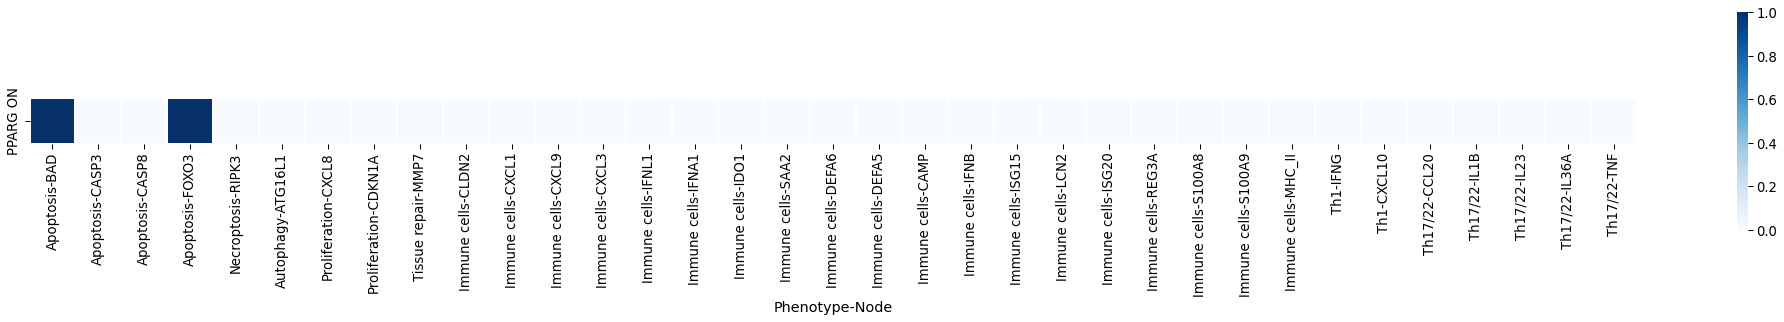

In [50]:
mod_PPARG = ( 'PPARG ==1 ')

mod_PPARG_fp = fix_df.query(mod_PPARG) 
mod_PPARG_fp = mod_PPARG_fp[markers] 
mod_PPARG_fp.columns = pd.MultiIndex.from_arrays(phen_arrays, names=['Phenotype', 'Node'])

frames = [mod_PPARG_fp]
all_results = pd.concat(frames, keys=["PPARG ON"] )
all_results.index = all_results.index.droplevel(1)

#Create heading
print('\033[1m' + "Figure 28. Predicted stable state of markers with PPARG ON" + '\033[0m')
fig, ax = plt.subplots(figsize=(36, 40))
sns.set_context("paper", font_scale=1.5)

#Create heatmap
f = sns.heatmap(all_results, cmap = "Blues", square = True, linewidth=0.3, cbar_kws={"shrink": .1})
plt.show()

f.figure.savefig('stable_state_PPARG.png')


Figure 29. Predicted stable state of regulators with PPARG ON


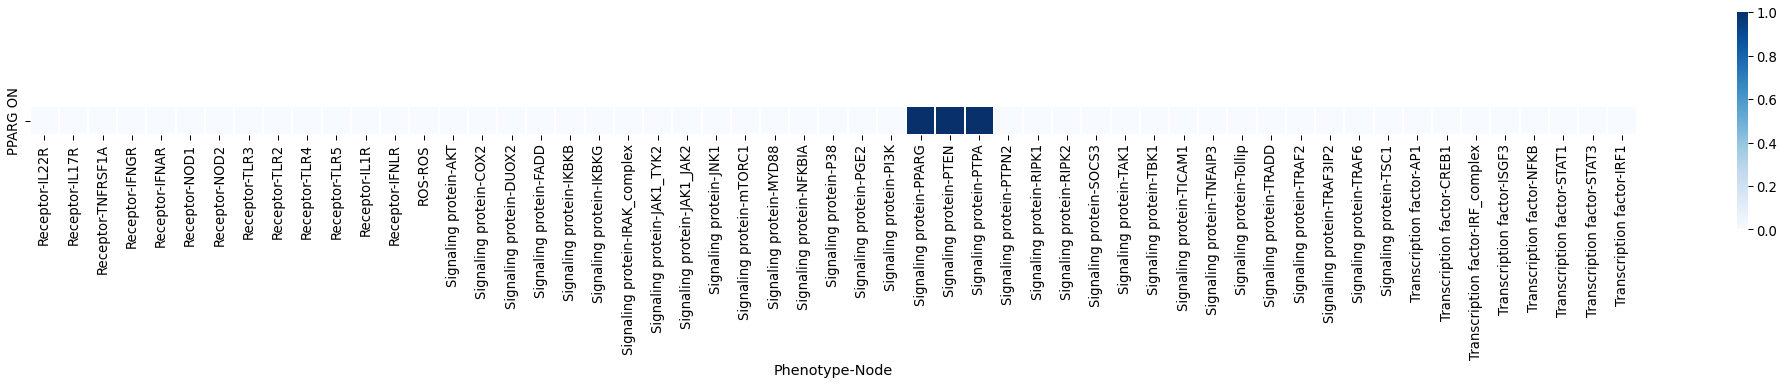

In [51]:
mod_PPARG = ( 'PPARG ==1 ')

mod_PPARG_fp = fix_df.query(mod_PPARG) 
mod_PPARG_fp = mod_PPARG_fp[regulators] 
mod_PPARG_fp.columns = pd.MultiIndex.from_arrays(reg_arrays, names=['Phenotype', 'Node'])

frames = [mod_PPARG_fp]
all_results = pd.concat(frames, keys=["PPARG ON"] )
all_results.index = all_results.index.droplevel(1)

#Create heading
print('\033[1m' + "Figure 29. Predicted stable state of regulators with PPARG ON" + '\033[0m')
fig, ax = plt.subplots(figsize=(36, 40))
sns.set_context("paper", font_scale=1.5)

#Create heatmap
f = sns.heatmap(all_results, cmap = "Blues", square = True, linewidth=0.3, cbar_kws={"shrink": .1})
plt.show()

f.figure.savefig('stable_state_PPARG.png')

The results show that the activation of PPARG negatively regulates the inflammatory signaling pathways, resulting in the downregulation of the inflammatory and ALL-associated markers expressed by the model. Thus, the results suggest that targeting PPARG in ALL patients may be beneficial to obtain resolution of inflammation.